<div align="center">
  <img src="data/logo.png" alt="Logo" width="300">
	<p>Mapping in Python, the way it was always meant to be.</p>
</div>

# **PRESENTATION**

Cartograpy est un package python qui permet de manipuler des données geographiques et de creer des cartes simplement.

# **FONCTIONNALITE**
- Telecharger des données de découpage administratif de pays
- Importer des données de types vectorielles et matricielles
- Faire des traitement sur les données geospatiales importé
- Creer des cartes et les personnaliser simplement

# **INSTALLATION**

Pour installer le package cartograpy, vous pouvez utiliser pip. Ouvrez votre terminal ou invite de commande et exécutez la commande suivante :

```bash
pip install cartograpy
```

# **UTILISATION**


## **Obtension de données géographiques**

### *Récupérer les limites administratives d'un ou plusieurs pays*

In [77]:
# Importation
from cartograpy import data
client = data.GeoBoundaries()

**Les niveau de subbdivision administrative disponibles sont :**

Il existe 5 subdivisions administratives disponibles :

In [78]:
print(client.adminLevels())


| Niveau GeoBoundaries | Nom commun (FR)           | Nom commun (EN)       |
| -------------------- | ------------------------- | --------------------- |
| ADM0                 | Pays                      | Country               |
| ADM1                 | Région / État / Province  | State / Region        |
| ADM2                 | Département / District    | District / County     |
| ADM3                 | Sous-préfecture / Commune | Subdistrict / Commune |
| ADM4                 | Village / Localité        | Village / Locality    |
| ADM5                 | Quartier / Secteur        | Neighborhood / Sector |
        


**Remarques importantes :**

- Le nombre de niveaux dépend du pays. Certains pays s’arrêtent à ADM2, d’autres vont jusqu’à ADM4 ou ADM5.
- Le nom réel des subdivisions varie d’un pays à l’autre (ex : “State”, “Region”, “Province”, “Department”, etc.).
- GeoBoundaries propose toujours au moins le niveau ADM0 (frontière nationale).

Pour savoir si un niveau administratif est disponible pour un pays, vous pouvez utiliser la méthode `is_valid_adm` de l'objet `GeoBoundaries`. 
Voici un exemple :

In [79]:
print(client.is_valid_adm("CIV","ADM1"))  # Exemple pour vérifier si le niveau ADM1 est valide pour la Côte d'Ivoire
# Ou encore
print(client._get_smallest_adm("CIV"))  # Exemple pour vérifier si le niveau admin minimum pour la Côte d'Ivoire

True
Smallest ADM level found for CIV : ADM3
ADM3


**Les codes des pays sont conformes à la norme ISO 3166-1 alpha-3 :**

Pour obtenir la liste des pays valides, vous pouvez utiliser la méthode `countries()` de l'objet `GeoBoundaries`. 
Voici un exemple :

In [80]:
client.countries()[0:10]  # Affiche les 10 premiers pays

['أفغانستان',
 'афганистан',
 'afghánistán',
 'afghanistan',
 'αφγανιστάν',
 'afganio',
 'afganistán',
 'afganistan',
 'afganisztán',
 'աֆղանստան']

In [81]:
client.get_iso3("burk")

'BFA'

In [82]:
client.get_iso3("con")  # Exemple pour obtenir le code ISO d'un pays

[('congo', 'cog'),
 ('república del congo', 'cog'),
 ('république du congo', 'cog'),
 ('rep. del congo', 'cog'),
 ('congo-brazzaville', 'cog'),
 ('república do congo', 'cog'),
 ('demokratiske republik congo', 'cod'),
 ('congo, democratic republic of the', 'cod'),
 ('república democrática del congo', 'cod'),
 ('république démocratique du congo', 'cod'),
 ('rd del congo', 'cod'),
 ('congo-kinshasa', 'cod'),
 ('república democrática do congo', 'cod'),
 ('republica democrată congo', 'cod')]

In [83]:

# Exemple 1: Récupérer les données administratives des régions de la cote d'ivoire
civ_data = client.adm("CIV", "ADM2")
civ_data.head()

geometry      shapeName shapeISO  \
0  POLYGON ((-4.68451 6.27179, -4.6868 6.26883, -...  Agneby-Tiassa            
1  POLYGON ((-7.71925 9.07004, -7.72574 9.06397, ...         Bafing            
2  POLYGON ((-6.19702 10.24246, -6.20038 10.24495...         Bagoue            
3  MULTIPOLYGON (((-4.68451 6.27179, -4.68338 6.2...         Belier            
4  POLYGON ((-6.70042 9.06196, -6.70118 9.05639, ...           Bere            

                   shapeID shapeGroup shapeType  
0  98640826B52449815511854        CIV      ADM2  
1  98640826B37750272367318        CIV      ADM2  
2  98640826B26044148659027        CIV      ADM2  
3   98640826B5123145245776        CIV      ADM2  
4  98640826B43857880322183        CIV      ADM2

In [84]:
# Exemple 2 : Récupérer les limites administratives de plusieurs pays (senegal et mali ici)
countries_data = client.adm(["SEN", "mali"], "ADM2")
countries_data["mali"].head()

geometry shapeName shapeISO  \
0  POLYGON ((-7.92938 12.68171, -7.93554 12.68821...    Bamako            
1  POLYGON ((1.32448 16.90639, 1.03227 16.61402, ...   Ansongo            
2  POLYGON ((1.17767 17.69958, 1.15458 17.70648, ...    Bourem            
3  POLYGON ((1.32448 16.90639, 1.65353 17.5735, 1...       Gao            
4  POLYGON ((1.31144 15.27381, 1.4716 15.28167, 1...    Menaka            

                  shapeID shapeGroup shapeType  
0  8926073B70420899930674        MLI      ADM2  
1  8926073B56917716124995        MLI      ADM2  
2  8926073B86504284097699        MLI      ADM2  
3  8926073B84061132695750        MLI      ADM2  
4   8926073B3742503303790        MLI      ADM2

### Récupérer les métadonnées d'un territoire

In [85]:

# Récupérer les métadonnées d'un territoire
metadata_civ = client.metadata("CIV", "ADM0")


print(f"Métadonnées disponibles pour la Côte d'Ivoire: {metadata_civ.keys()}")


Métadonnées disponibles pour la Côte d'Ivoire: dict_keys(['boundaryID', 'boundaryName', 'boundaryISO', 'boundaryYearRepresented', 'boundaryType', 'boundaryCanonical', 'boundarySource', 'boundaryLicense', 'licenseDetail', 'licenseSource', 'boundarySourceURL', 'sourceDataUpdateDate', 'buildDate', 'Continent', 'UNSDG-region', 'UNSDG-subregion', 'worldBankIncomeGroup', 'admUnitCount', 'meanVertices', 'minVertices', 'maxVertices', 'meanPerimeterLengthKM', 'minPerimeterLengthKM', 'maxPerimeterLengthKM', 'meanAreaSqKM', 'minAreaSqKM', 'maxAreaSqKM', 'staticDownloadLink', 'gjDownloadURL', 'tjDownloadURL', 'imagePreview', 'simplifiedGeometryGeoJSON'])


In [86]:
metadata_civ["Continent"]

'Africa'

In [87]:
metadata_civ["UNSDG-subregion"]

'Western Africa'

In [88]:
metadata_civ["UNSDG-region"]

'Sub-Saharan Africa'

In [89]:
url_img=metadata_civ["imagePreview"]
url_img

'https://github.com/wmgeolab/geoBoundaries/raw/9469f09/releaseData/gbOpen/CIV/ADM0/geoBoundaries-CIV-ADM0-PREVIEW.png'

In [90]:
# Afficher l'image de prévisualisation dans le notebook
from IPython.display import Image, display

try :
    display(Image(url=url_img))
except :
    print("Impossible d'afficher l'image.")

### *Géocoder une ou plusieurs adresses*

Le geocodage permet de convertir des adresses en coordonnées géographiques (latitude et longitude).
Vous pouvez géocoder une ou plusieurs adresses en utilisant les méthode `geocode` et `geocode_batch` de l'objet `Geocoder`.

In [91]:
from cartograpy import data
geocoder= data.Geocoder()

**Géocoder une adresse**


In [92]:
address = "bouaké"
result = geocoder.geocode(address)

# Adresse trouvée
result[0]

Début du géocodage de 1 localité(s)...
Géocodage terminé.


query                                          address  latitude  \
0  bouaké  Bouaké, Gbêkê, Vallée du Bandama, Côte d’Ivoire  7.689021   

   longitude  altitude                                                raw  \
0  -5.028355       0.0  {'place_id': 275820936, 'licence': 'Data © Ope...   

                   geometry  
0  POINT (-5.02836 7.68902)

In [93]:
# Adresse non trouvée
result[1]

[]

**Geocoder une liste d'adresses**

In [94]:
liste_adresses = ["Abidjan", "Yamoussoukro", "Bouaké", "Korhogo","Man CI", "","portbouet"]
results=geocoder.geocode(liste_adresses)

# Adresses trouvées
results[0]

Début du géocodage de 7 localité(s)...
Géocodage terminé.


query                                          address  latitude  \
0       Abidjan      Abidjan, Le Plateau, Abidjan, Côte d’Ivoire  5.320357   
1  Yamoussoukro                      Yamoussoukro, Côte d’Ivoire  6.820007   
2        Bouaké  Bouaké, Gbêkê, Vallée du Bandama, Côte d’Ivoire  7.689021   
3       Korhogo            Korhogo, Poro, Savanes, Côte d’Ivoire  9.458070   
4        Man CI            Man, Tonkpi, Montagnes, Côte d’Ivoire  7.410258   

   longitude  altitude                                                raw  \
0  -4.016107       0.0  {'place_id': 275930228, 'licence': 'Data © Ope...   
1  -5.277603       0.0  {'place_id': 405334522, 'licence': 'Data © Ope...   
2  -5.028355       0.0  {'place_id': 275820936, 'licence': 'Data © Ope...   
3  -5.631629       0.0  {'place_id': 276083703, 'licence': 'Data © Ope...   
4  -7.550372       0.0  {'place_id': 277270784, 'licence': 'Data © Ope...   

                   geometry  
0  POINT (-4.01611 5.32036)  
1   POINT (-5.2776 6.82001)  
2  POINT (-5.02836 7.68902)  
3  POINT (-5.63163 9.45807)  
4  POINT (-7.55037 7.41026)

In [95]:
# Adresses non trouvée
results[1]

['', 'portbouet']

## **Processing de données**

`processing` vous permet d'executer des taches courantes effectuées sur des données vectorielles.

In [96]:
# Importation
from cartograpy.processing  import *

### *Charger des données*

In [97]:
# hexagon_data=load("data\other\hexagon 0.2_Jointure data raster.geojson")
# hexagon_data.head()

In [98]:
path="data\other\Département de Bouna.geojson"
donnee_bouna=load(path)
donnee_bouna.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\kanic\AppData\Local\Temp\ipykernel_13180\847831339.py:1: SyntaxWarning: invalid escape sequence '\o'
  path="data\other\Département de Bouna.geojson"


id   Name                                        description  \
0  ID_00022  Bouna  <html xmlns:fo="http://www.w3.org/1999/XSL/For...   

  timestamp begin   end   altitudeMode  tessellate  extrude  visibility  \
0      None  None  None  clampToGround          -1        0          -1   

  drawOrder  icon snippet                                           geometry  
0      None  None          MULTIPOLYGON Z (((-4.19952 9.61499 0, -4.209 9...

### *Obtenir des informations sur un multipolygone*

In [99]:
multipolygon=donnee_bouna["geometry"][0]
infos_multipolygon=get_multipolygon_info(multipolygon)
infos_multipolygon

{'type': 'MultiPolygon',
 'num_polygons': 1,
 'total_area': 1.1852617495377915,
 'bounds': (-4.297637881999947,
  8.508406537000042,
  -2.596283662999952,
  9.616030601000034),
 'areas': [1.1852617495377915],
 'largest_polygon_area': 1.1852617495377915,
 'smallest_polygon_area': 1.1852617495377915}

### *Séparer un multipolygon en polygone simple*

In [100]:
polygones_bouna=split_multipolygon(donnee_bouna)
polygones_bouna.head()

id   Name                                        description  \
0  ID_00022  Bouna  <html xmlns:fo="http://www.w3.org/1999/XSL/For...   

  timestamp begin   end   altitudeMode  tessellate  extrude  visibility  \
0      None  None  None  clampToGround          -1        0          -1   

  drawOrder  icon snippet                                           geometry  \
0      None  None          POLYGON Z ((-4.19952 9.61499 0, -4.209 9.61568...   

   original_index  polygon_part  
0               0             0

<Axes: >

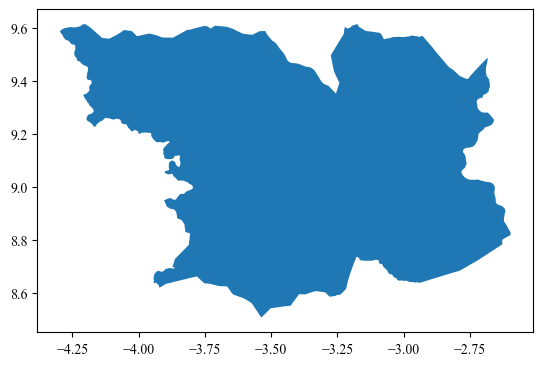

In [101]:
polygones_bouna.plot()

### *Fusionner des geodataframe*

In [102]:
# Exemple 2 : Récupérer les limites administratives de plusieurs pays (senegal et mali ici)
countries_data = client.adm(["SEN", "mali","civ"], "ADM2")
list_gdf=[gdf for key, gdf in countries_data.items()] # Liste de dataframes
countries_merged_data=fusion(list_gdf) # Fusion des dataframes
countries_merged_data.head()

geometry   shapeName shapeISO  \
0  POLYGON ((-11.88782 13.38481, -11.88765 13.391...       Bakel            
1  POLYGON ((-16.38592 15.02258, -16.40452 15.023...      Bambey            
2  POLYGON ((-15.9775 12.88596, -15.97446 12.8904...     Bignona            
3  POLYGON ((-15.59024 13.8291, -15.58246 13.8437...   Birkelane            
4  POLYGON ((-15.9775 12.88596, -15.97 12.89171, ...  Bounkiling            

                   shapeID shapeGroup shapeType  
0  50182788B16013842146029        SEN      ADM2  
1  50182788B75300917140294        SEN      ADM2  
2  50182788B19391387689457        SEN      ADM2  
3  50182788B56779252201559        SEN      ADM2  
4  50182788B68388966372963        SEN      ADM2

### *Creer une nouvelle colonne*

In [103]:
new_countries_data=add_column(df=countries_merged_data,column_name="random_data",expression="random.randint(1,100)",globals_dict={"random":random})
# global_dics correspond a la liste des packages necessaires pour evaluer l'expression
new_countries_data.head()

geometry   shapeName shapeISO  \
0  POLYGON ((-11.88782 13.38481, -11.88765 13.391...       Bakel            
1  POLYGON ((-16.38592 15.02258, -16.40452 15.023...      Bambey            
2  POLYGON ((-15.9775 12.88596, -15.97446 12.8904...     Bignona            
3  POLYGON ((-15.59024 13.8291, -15.58246 13.8437...   Birkelane            
4  POLYGON ((-15.9775 12.88596, -15.97 12.89171, ...  Bounkiling            

                   shapeID shapeGroup shapeType  random_data  
0  50182788B16013842146029        SEN      ADM2            2  
1  50182788B75300917140294        SEN      ADM2           45  
2  50182788B19391387689457        SEN      ADM2            8  
3  50182788B56779252201559        SEN      ADM2           19  
4  50182788B68388966372963        SEN      ADM2           65

In [104]:
new_countries_data=add_column(new_countries_data,"dataType","row['shapeGroup']+'-'+row['shapeType']")
# row dans l'expression correspont a une ligne de la dataframe
# shapeGroup et shapeType sont des colonnes de la dataframe
new_countries_data.head()

geometry   shapeName shapeISO  \
0  POLYGON ((-11.88782 13.38481, -11.88765 13.391...       Bakel            
1  POLYGON ((-16.38592 15.02258, -16.40452 15.023...      Bambey            
2  POLYGON ((-15.9775 12.88596, -15.97446 12.8904...     Bignona            
3  POLYGON ((-15.59024 13.8291, -15.58246 13.8437...   Birkelane            
4  POLYGON ((-15.9775 12.88596, -15.97 12.89171, ...  Bounkiling            

                   shapeID shapeGroup shapeType  random_data  dataType  
0  50182788B16013842146029        SEN      ADM2            2  SEN-ADM2  
1  50182788B75300917140294        SEN      ADM2           45  SEN-ADM2  
2  50182788B19391387689457        SEN      ADM2            8  SEN-ADM2  
3  50182788B56779252201559        SEN      ADM2           19  SEN-ADM2  
4  50182788B68388966372963        SEN      ADM2           65  SEN-ADM2

In [105]:
list(new_countries_data.columns)

['geometry',
 'shapeName',
 'shapeISO',
 'shapeID',
 'shapeGroup',
 'shapeType',
 'random_data',
 'dataType']

### *Creer un geodataframe de centroïde*

In [106]:

coundtries_centroids = centroids(new_countries_data)

# Maintenant coundtries_centroids est un GeoDataFrame de points (centroïdes)
# avec tous les attributs originaux de new_countries_data

coundtries_centroids.head()

geometry   shapeName shapeISO                  shapeID  \
0  POINT (-12.25523 14.17004)       Bakel           50182788B16013842146029   
1  POINT (-16.48386 14.80261)      Bambey           50182788B75300917140294   
2  POINT (-16.36673 12.88758)     Bignona           50182788B19391387689457   
3  POINT (-15.68446 14.05259)   Birkelane           50182788B56779252201559   
4  POINT (-15.60351 13.13488)  Bounkiling           50182788B68388966372963   

  shapeGroup shapeType  random_data  dataType  
0        SEN      ADM2            2  SEN-ADM2  
1        SEN      ADM2           45  SEN-ADM2  
2        SEN      ADM2            8  SEN-ADM2  
3        SEN      ADM2           19  SEN-ADM2  
4        SEN      ADM2           65  SEN-ADM2

<Axes: >

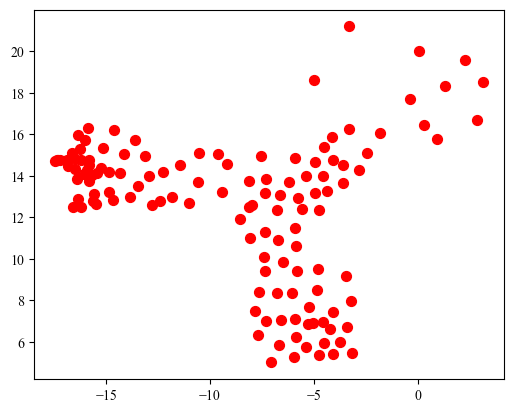

In [107]:

# Visualisation simple avec matplotlib

coundtries_centroids.plot(markersize=50, color='red',label="Centroïde")

## **Visualisation de données**

cartograpy permet de creer rapidement des cartes pour visualier les données géographiques.

In [108]:
from cartograpy.mapper import *

In [109]:
# J'ajoute des données aléatoires pour la visualisation
import random
civ_data['data'] = [random.randint(0,10000) for i in range(len(civ_data))]

In [110]:
civ_data.head()

geometry      shapeName shapeISO  \
0  POLYGON ((-4.68451 6.27179, -4.6868 6.26883, -...  Agneby-Tiassa            
1  POLYGON ((-7.71925 9.07004, -7.72574 9.06397, ...         Bafing            
2  POLYGON ((-6.19702 10.24246, -6.20038 10.24495...         Bagoue            
3  MULTIPOLYGON (((-4.68451 6.27179, -4.68338 6.2...         Belier            
4  POLYGON ((-6.70042 9.06196, -6.70118 9.05639, ...           Bere            

                   shapeID shapeGroup shapeType  data  
0  98640826B52449815511854        CIV      ADM2  1075  
1  98640826B37750272367318        CIV      ADM2  6681  
2  98640826B26044148659027        CIV      ADM2  9867  
3   98640826B5123145245776        CIV      ADM2  9790  
4  98640826B43857880322183        CIV      ADM2  6960

In [111]:
geocode_localite=results[0]
geocode_localite["data"]= [random.randint(0,10000) for i in range(len(geocode_localite))]
geocode_localite.head()

query                                          address  latitude  \
0       Abidjan      Abidjan, Le Plateau, Abidjan, Côte d’Ivoire  5.320357   
1  Yamoussoukro                      Yamoussoukro, Côte d’Ivoire  6.820007   
2        Bouaké  Bouaké, Gbêkê, Vallée du Bandama, Côte d’Ivoire  7.689021   
3       Korhogo            Korhogo, Poro, Savanes, Côte d’Ivoire  9.458070   
4        Man CI            Man, Tonkpi, Montagnes, Côte d’Ivoire  7.410258   

   longitude  altitude                                                raw  \
0  -4.016107       0.0  {'place_id': 275930228, 'licence': 'Data © Ope...   
1  -5.277603       0.0  {'place_id': 405334522, 'licence': 'Data © Ope...   
2  -5.028355       0.0  {'place_id': 275820936, 'licence': 'Data © Ope...   
3  -5.631629       0.0  {'place_id': 276083703, 'licence': 'Data © Ope...   
4  -7.550372       0.0  {'place_id': 277270784, 'licence': 'Data © Ope...   

                   geometry  data  
0  POINT (-4.01611 5.32036)  5832  
1   POINT (-5.2776 6.82001)   513  
2  POINT (-5.02836 7.68902)  3729  
3  POINT (-5.63163 9.45807)  2584  
4  POINT (-7.55037 7.41026)  1869

### *Voir la liste des palletes de couleurs diponible*

In [112]:
# Les groupes de palettes diponibles
get_available_palettes().keys()

dict_keys(['custom', 'seaborn_qualitative', 'seaborn_sequential', 'seaborn_diverging', 'matplotlib_sequential', 'matplotlib_diverging', 'matplotlib_cyclic', 'matplotlib_qualitative'])

In [113]:
# Voir les pallettes disponibles dans un groupe
get_available_palettes()["seaborn_sequential"]

['Blues',
 'BuGn',
 'BuPu',
 'GnBu',
 'Greens',
 'Greys',
 'Oranges',
 'OrRd',
 'PuBu',
 'PuBuGn',
 'PuRd',
 'Purples',
 'RdPu',
 'Reds',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'rocket',
 'mako',
 'flare',
 'crest']

### *Voir la liste des polices d'écritures disponibles*

In [114]:
get_fonts()[0:10] # Pour voir les 10 prémières polices 

['Agency FB',
 'Algerian',
 'Arial',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi']

In [115]:
# Pour filtrer par un mot clé
get_fonts("time")[0]

'Times New Roman'

### *Visualiser des données vectorielles*
**Creer une carte cloropleth simple**

c:\Users\kanic\OneDrive\cartograpy\cartograpy\mapper.py:1544: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_obj = plt.cm.get_cmap(cmap)
c:\Users\kanic\OneDrive\cartograpy\cartograpy\mapper.py:1716: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_obj = plt.cm.get_cmap(cmap)
Can't handle color: param(outline)
Can't handle color: param(outline)


📊 Centrage intelligent appliqué:
   Format: Personnalisé (N/A)
   Ratio figure: 1.33
   Ratio données: 0.95
   Étendue: [-10.39, -0.69, 3.91, 11.19]
📊 Centrage intelligent appliqué:
   Format: Personnalisé (N/A)
   Ratio figure: 1.33
   Ratio données: 0.95
   Étendue: [-10.39, -0.69, 3.91, 11.19]


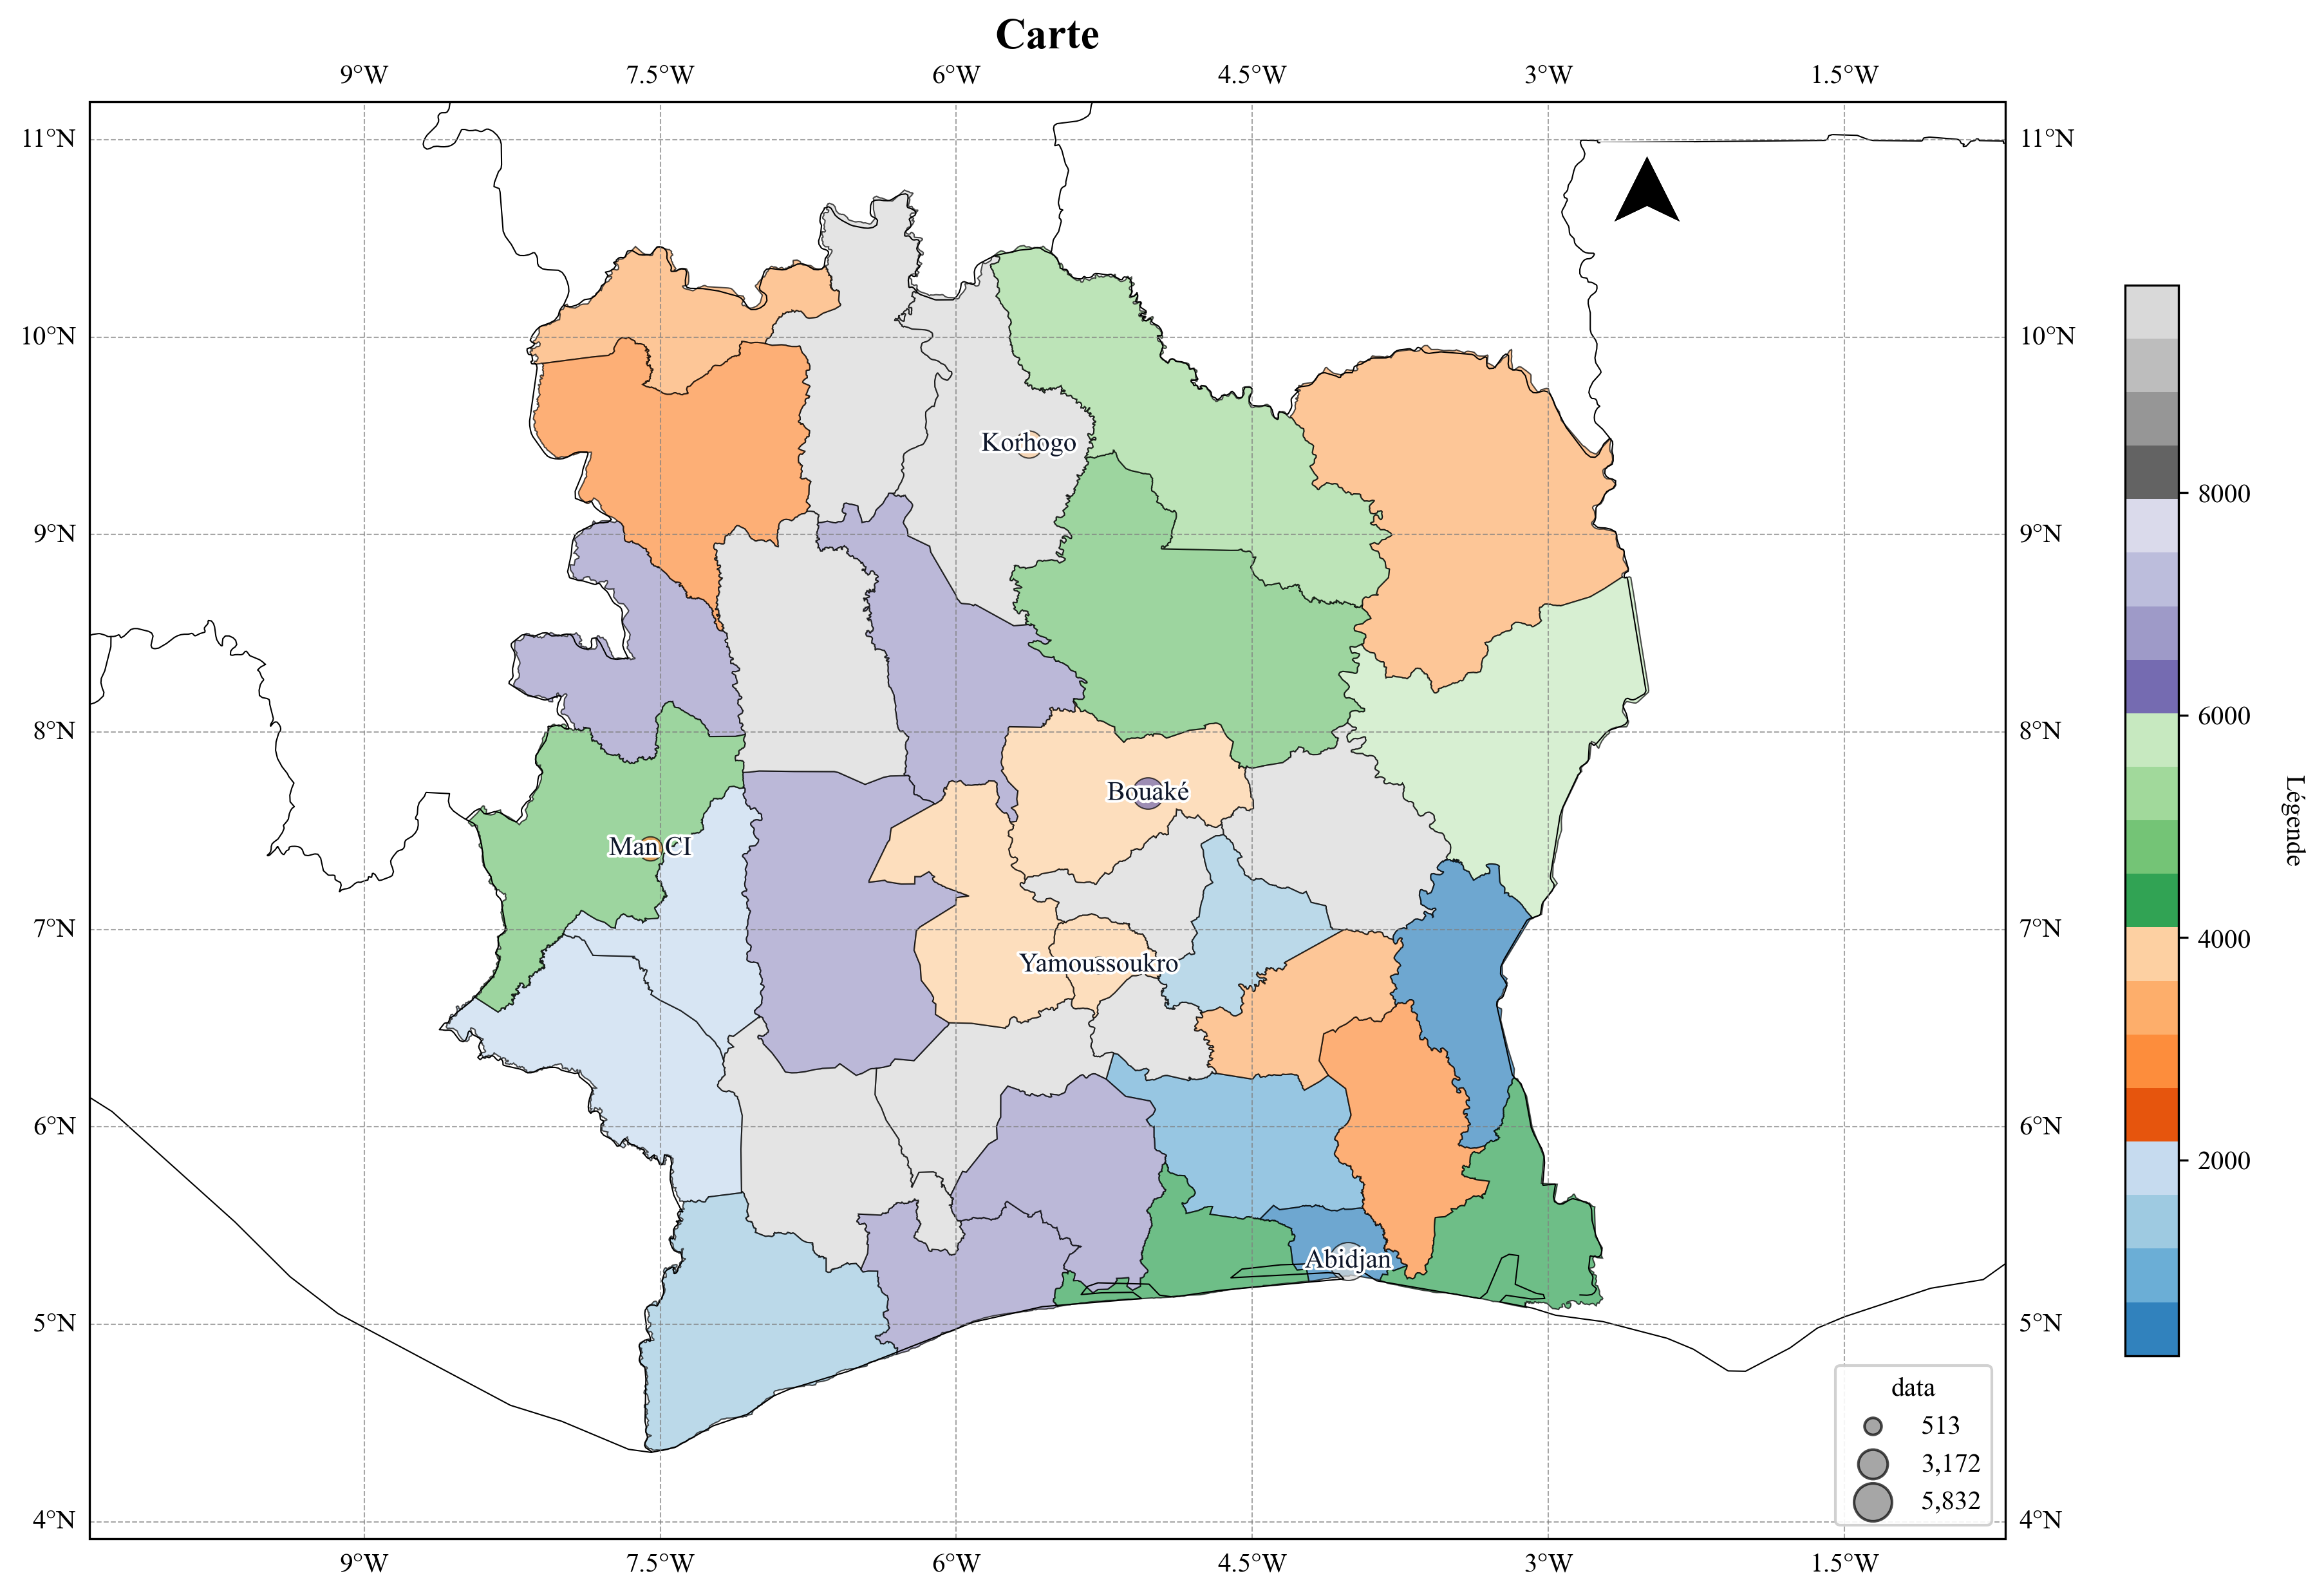

In [116]:
carte_ci=Map(figsize=(16, 12), projection=ccrs.PlateCarree())
carte_ci.add_polygons_cloropleth(gdf=civ_data,
                              column_to_plot='data',
                                title='Légende',
                                cmap='tab20c',
                                )
carte_ci.add_points_cloropleth(
    gdf=geocode_localite,
    column_to_plot="data",
    label_column="query",
    point_size_column="data",
    show_colorbar=False,
    cmap="tab20c"
    
)
carte_ci.add_gridlines()
font_name=get_fonts("time")[0]
font_name
carte_ci.set_font(font_name, size=12)
carte_ci.add_arrow(3, position=(-2.5,10.75),zoom=0.06, color="black")
carte_ci.figsize=(18,16)

### *Visualiser des données rasters*

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
C:\Users\kanic\AppData\Local\Temp\ipykernel_13180\1404476908.py:5: SyntaxWarning: invalid escape sequence '\o'
  carte_dem.add_raster('data\other\Limite DEM Bouna.tif', cmap='tab20c', title='Élévation (m)')
Can't handle color: param(outline)
Can't handle color: param(outline)


Location est : (0.1, 0.05). La bare d'échelle est placé à 10.0 % de la longeur et à 5.0 % de la hauteur)


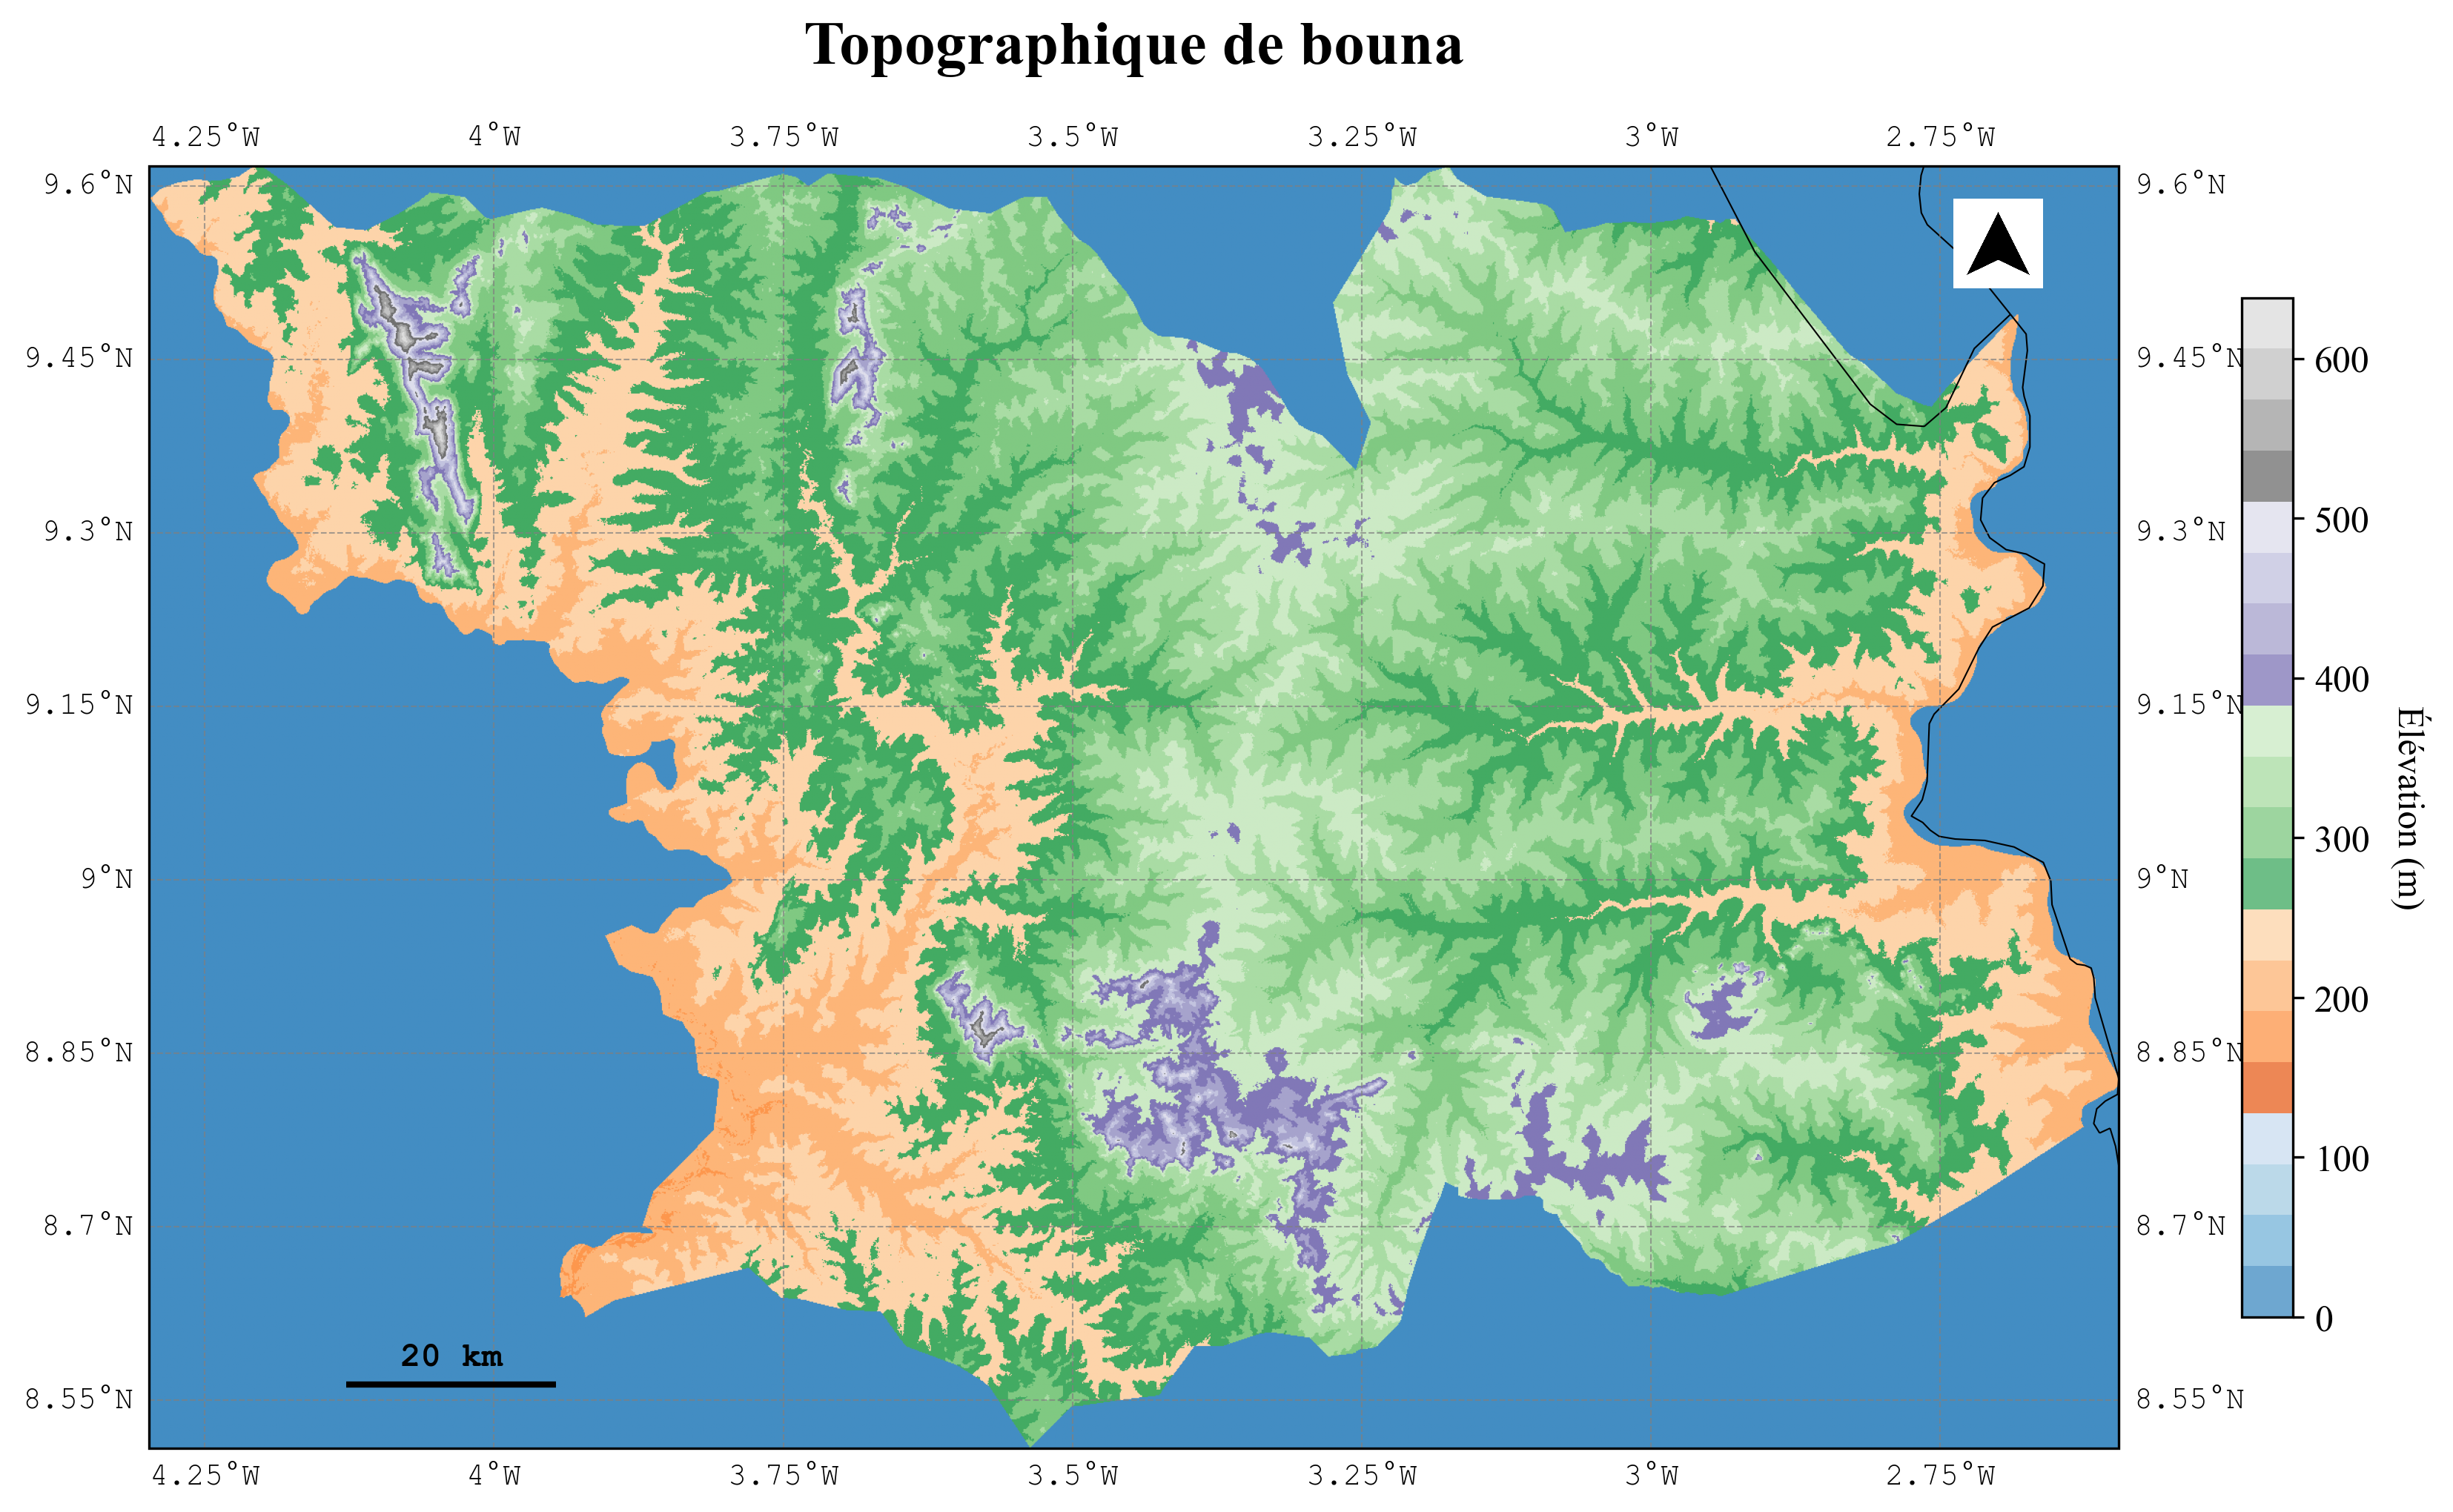

In [117]:
# Création d'une carte raster
carte_dem = Map(figsize=(12, 8), projection=ccrs.PlateCarree())

# Ajout d'une couche raster
carte_dem.add_raster('data\other\Limite DEM Bouna.tif', cmap='tab20c', title='Élévation (m)')

font_name=get_fonts("couri")[0]

carte_dem.set_font(font_name, size=12)
carte_dem.set_title('Topographique de bouna', fontsize=20, color='Black', pad=20)
carte_dem.add_arrow(3, position=(-2.70, 9.55), zoom=0.05, color='black')
carte_dem.add_gridlines()
carte_dem.add_scale_bar(length=20, units="km",pad=0.01)
carte_dem.show()


# Sauvegarde
# carte.save('carte_demo.png')

In [118]:
civ_data.head()

geometry      shapeName shapeISO  \
0  POLYGON ((-4.68451 6.27179, -4.6868 6.26883, -...  Agneby-Tiassa            
1  POLYGON ((-7.71925 9.07004, -7.72574 9.06397, ...         Bafing            
2  POLYGON ((-6.19702 10.24246, -6.20038 10.24495...         Bagoue            
3  MULTIPOLYGON (((-4.68451 6.27179, -4.68338 6.2...         Belier            
4  POLYGON ((-6.70042 9.06196, -6.70118 9.05639, ...           Bere            

                   shapeID shapeGroup shapeType  data  
0  98640826B52449815511854        CIV      ADM2  1075  
1  98640826B37750272367318        CIV      ADM2  6681  
2  98640826B26044148659027        CIV      ADM2  9867  
3   98640826B5123145245776        CIV      ADM2  9790  
4  98640826B43857880322183        CIV      ADM2  6960

In [119]:
list(civ_data.shapeName.unique())[0:10]

['Agneby-Tiassa',
 'Bafing',
 'Bagoue',
 'Belier',
 'Bere',
 'Bounkani',
 'Cavally',
 "District Autonome D'Abidjan",
 'District Autonome De Yamoussoukro',
 'Folon']

In [120]:
civ_data["shapeName"].replace({
    "District Autonome D'Abidjan": "Abidjan",
    "District Autonome De Yamoussoukro": "Yamoussoukro"
}, inplace=True)

C:\Users\kanic\AppData\Local\Temp\ipykernel_13180\1025282276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  civ_data["shapeName"].replace({


In [121]:
geocode_localite.head()

query                                          address  latitude  \
0       Abidjan      Abidjan, Le Plateau, Abidjan, Côte d’Ivoire  5.320357   
1  Yamoussoukro                      Yamoussoukro, Côte d’Ivoire  6.820007   
2        Bouaké  Bouaké, Gbêkê, Vallée du Bandama, Côte d’Ivoire  7.689021   
3       Korhogo            Korhogo, Poro, Savanes, Côte d’Ivoire  9.458070   
4        Man CI            Man, Tonkpi, Montagnes, Côte d’Ivoire  7.410258   

   longitude  altitude                                                raw  \
0  -4.016107       0.0  {'place_id': 275930228, 'licence': 'Data © Ope...   
1  -5.277603       0.0  {'place_id': 405334522, 'licence': 'Data © Ope...   
2  -5.028355       0.0  {'place_id': 275820936, 'licence': 'Data © Ope...   
3  -5.631629       0.0  {'place_id': 276083703, 'licence': 'Data © Ope...   
4  -7.550372       0.0  {'place_id': 277270784, 'licence': 'Data © Ope...   

                   geometry  data  
0  POINT (-4.01611 5.32036)  5832  
1   POINT (-5.2776 6.82001)   513  
2  POINT (-5.02836 7.68902)  3729  
3  POINT (-5.63163 9.45807)  2584  
4  POINT (-7.55037 7.41026)  1869

In [122]:
font=get_fonts("time")[0]
font

'Times New Roman'

Can't handle color: param(outline)
Can't handle color: param(outline)


📄 Format de papier: A4 (landscape) - Dimensions: 210 x 297 mm - Figure: 11.7" x 8.3"
⚠️  Attention: Aucun CRS défini. Attribution du CRS par défaut: EPSG:4326
📄 Format mis à jour: A4 (landscape) - Dimensions: 210 x 297 mm - Figure: 11.7" x 8.3"
{'fontsize': 12, 'title_fontsize': 12, 'frameon': True, 'fancybox': True, 'shadow': False, 'framealpha': 1.0, 'facecolor': 'white', 'edgecolor': '#888', 'borderpad': 1.0, 'columnspacing': 2.0, 'title': 'Légende', 'loc': 'lower right'}
🛑Element de légende ajouté None
✅ Légende personnalisée créée avec 2 éléments
🎨 Préréglage 'simple' appliqué à la légende
📊 Centrage intelligent appliqué:
   Format: A4 (landscape)
   Ratio figure: 1.41
   Ratio données: 0.95
   Étendue: [-10.96, -0.12, 3.72, 11.38]
🛑Element de légende ajouté None
✅ Légende personnalisée créée avec 2 éléments
Location est : (0.02, 0.03). La bare d'échelle est placé à 2.0 % de la longeur et à 3.0 % de la hauteur)


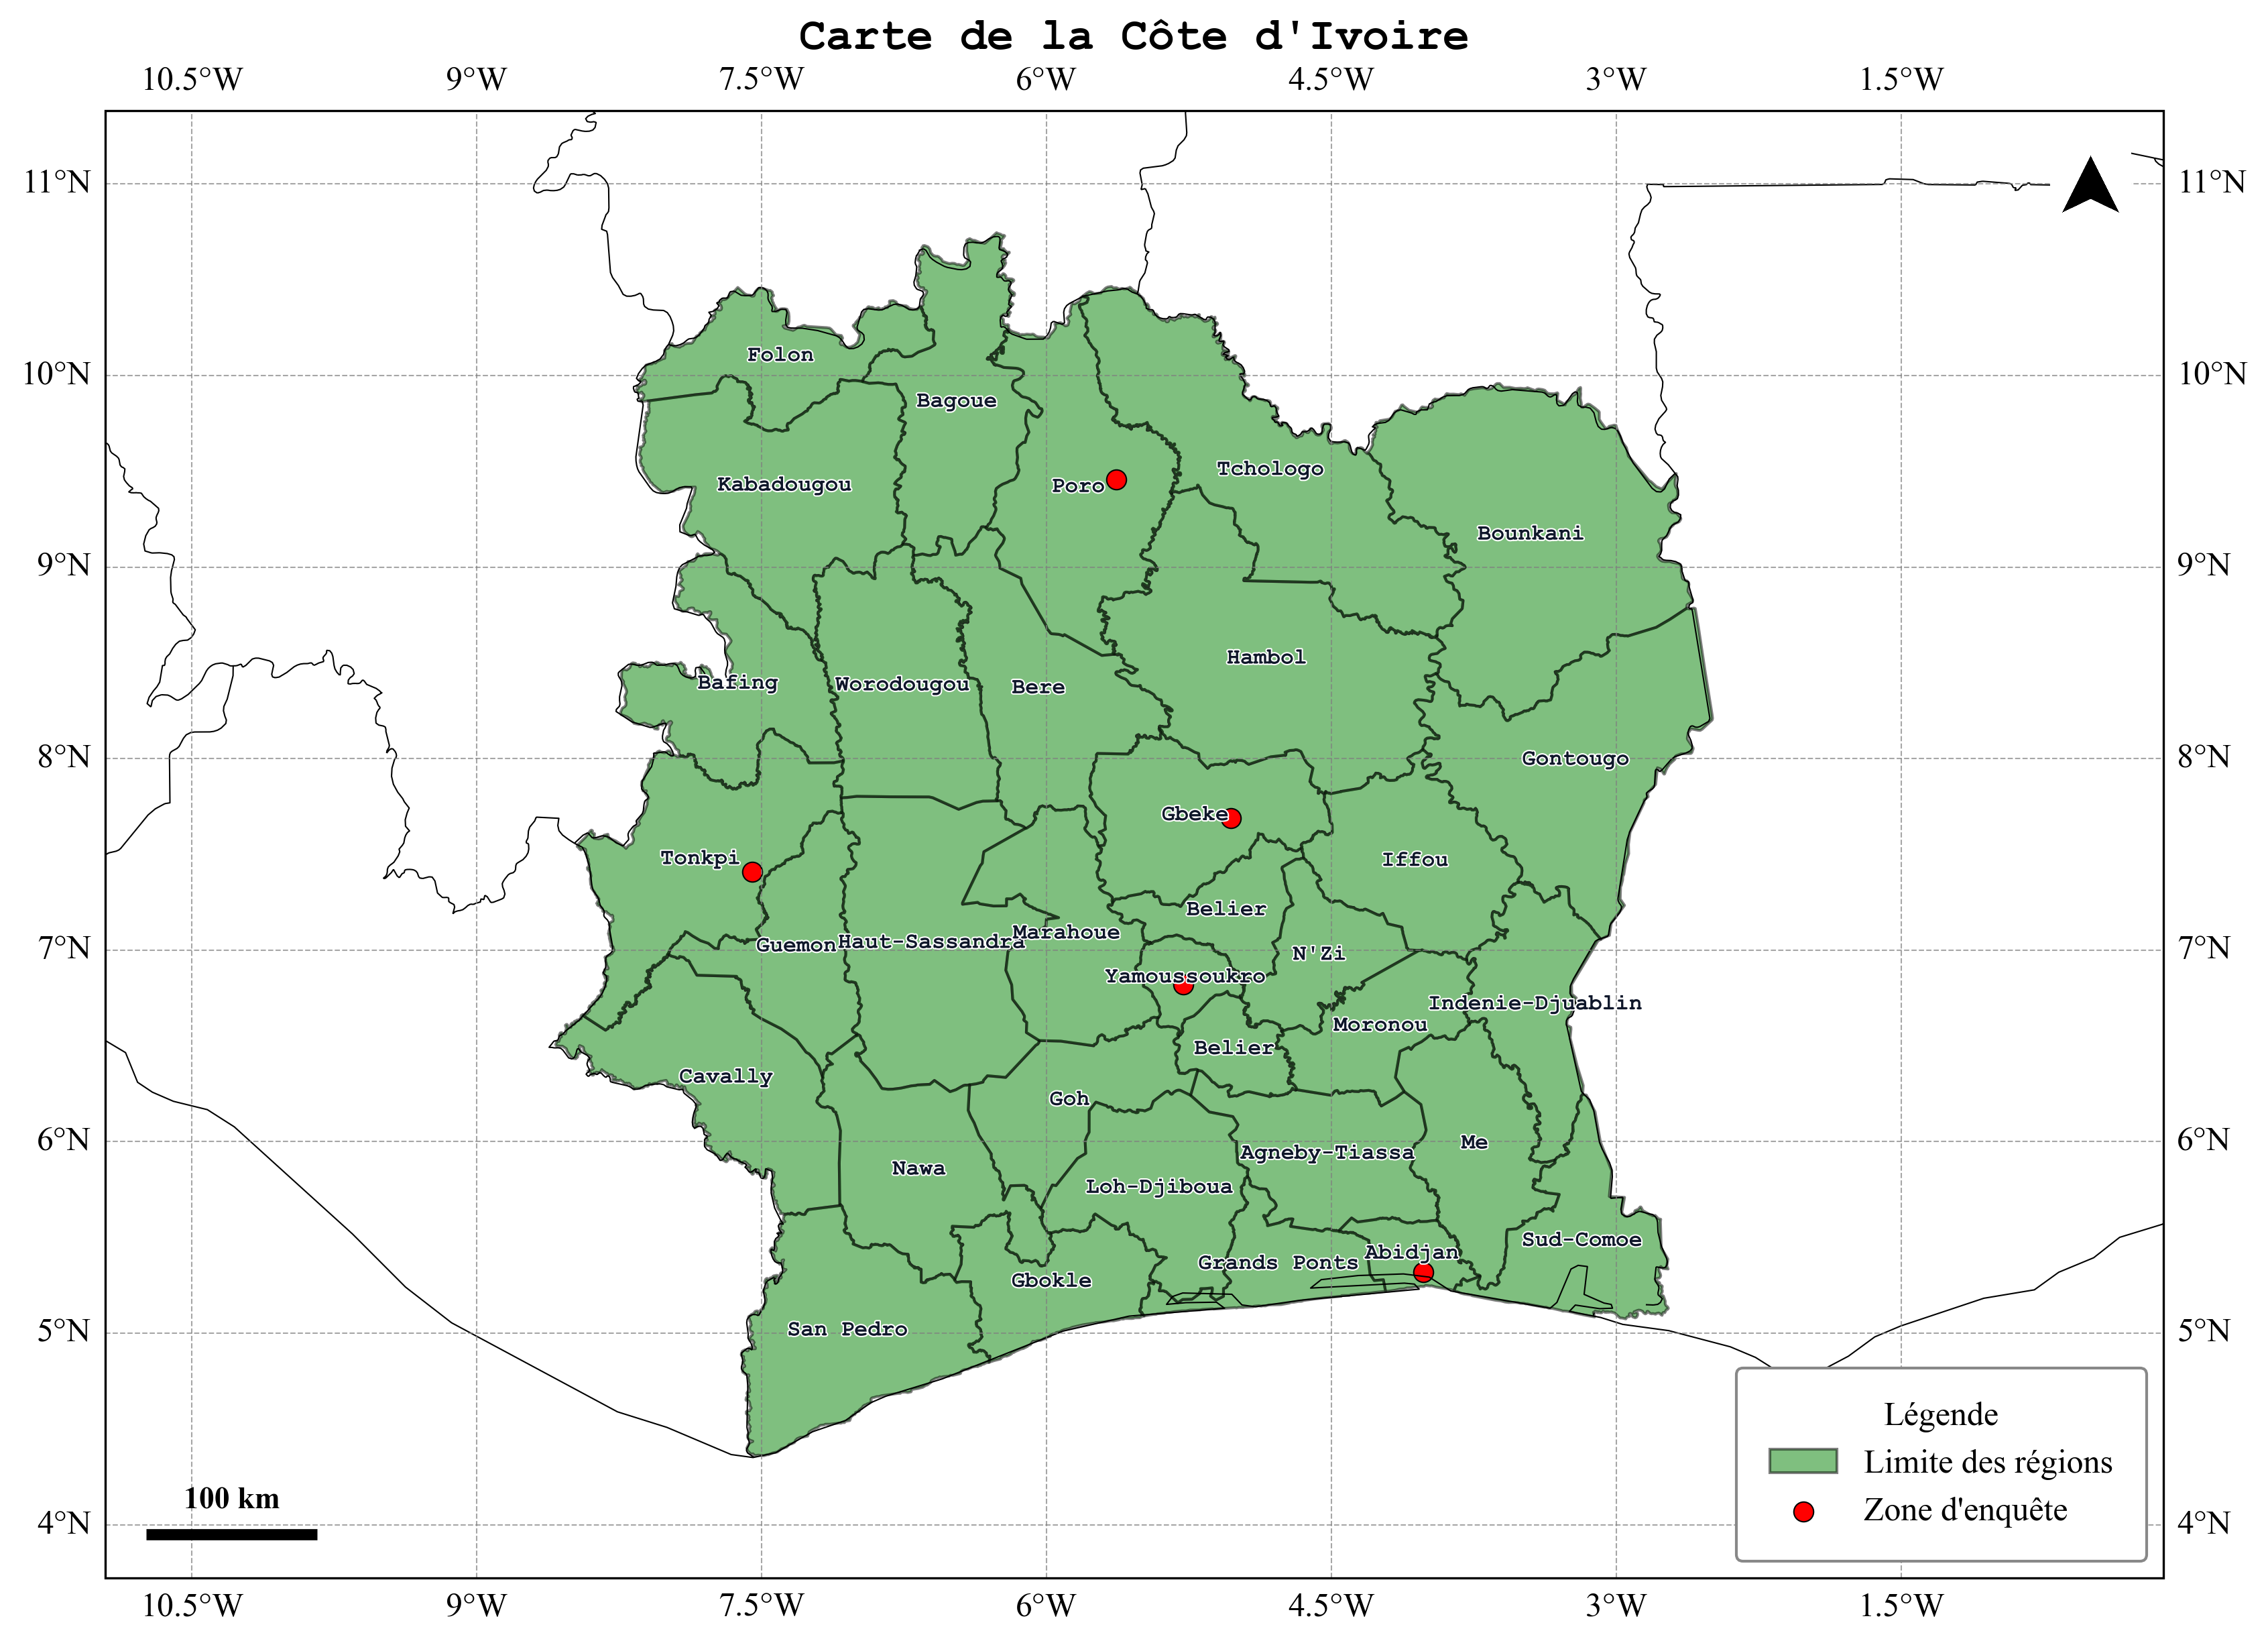

In [123]:

# Creer un objet de carte basique avec OpenLayers et Python
# =========================================================
carte1=Map(figsize="A4",title="Carte de la Côte d'Ivoire")

# Ajouter des couches de données
# =========================================================
carte1.add_polygons(gdf=civ_data,label="Limite des régions")
carte1.add_points(gdf=geocode_localite,label="Zone d'enquête")

# Ajouter des etiquettes
# =========================================================
carte1.add_labels(
    gdf=civ_data,
    label_column='shapeName',
    # custom_label="{row['data']}\n{row['shapeName']}", #Pour personnaliser l'affichage
    fontsize=8,
    # color="#e2f201",
    outline_width=1,
    fontweight="bold"
)

# Mofifier la tailles du papier en A4
# =========================================================
carte1.set_paper("A4")

# Ajouter les grilles de coordonnées
# =========================================================
carte1.add_gridlines(top_right=True,fontsize=12)

# Ajouter la légende
# =========================================================
carte1.legend_presets("simple", title="Légende", title_fontsize=12, fontsize=12,loc="lower right")

# Ajouter une barre d'echelle
# =========================================================
carte1.add_scale_bar(length=100, units="km", linewidth=4, location=(0.02,0.03))

# Ajouter la fleche du nord geographique
# =========================================================
carte1.add_arrow(arrow=3,position=(-0.5,11),zoom=0.05)

# Changer le style de police
# =========================================================
carte1.set_font(font)

# Afficher la carte 
# =========================================================
carte1.show(smart_centering=True)

# Enregistrer la carte
# =========================================================
# carte1.save("image.png")

### *Carte cloropleth*

📄 Format de papier: A4 (landscape) - Dimensions: 210 x 297 mm - Figure: 11.7" x 8.3"
📊 Centrage intelligent appliqué:
   Format: A4 (landscape)
   Ratio figure: 1.41
   Ratio données: 0.91
   Étendue: [-9.82, -1.18, 4.50, 10.61]
📊 Centrage intelligent appliqué:
   Format: A4 (landscape)
   Ratio figure: 1.41
   Ratio données: 0.91
   Étendue: [-9.82, -1.18, 4.50, 10.61]


c:\Users\kanic\OneDrive\cartograpy\cartograpy\mapper.py:1716: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_obj = plt.cm.get_cmap(cmap)


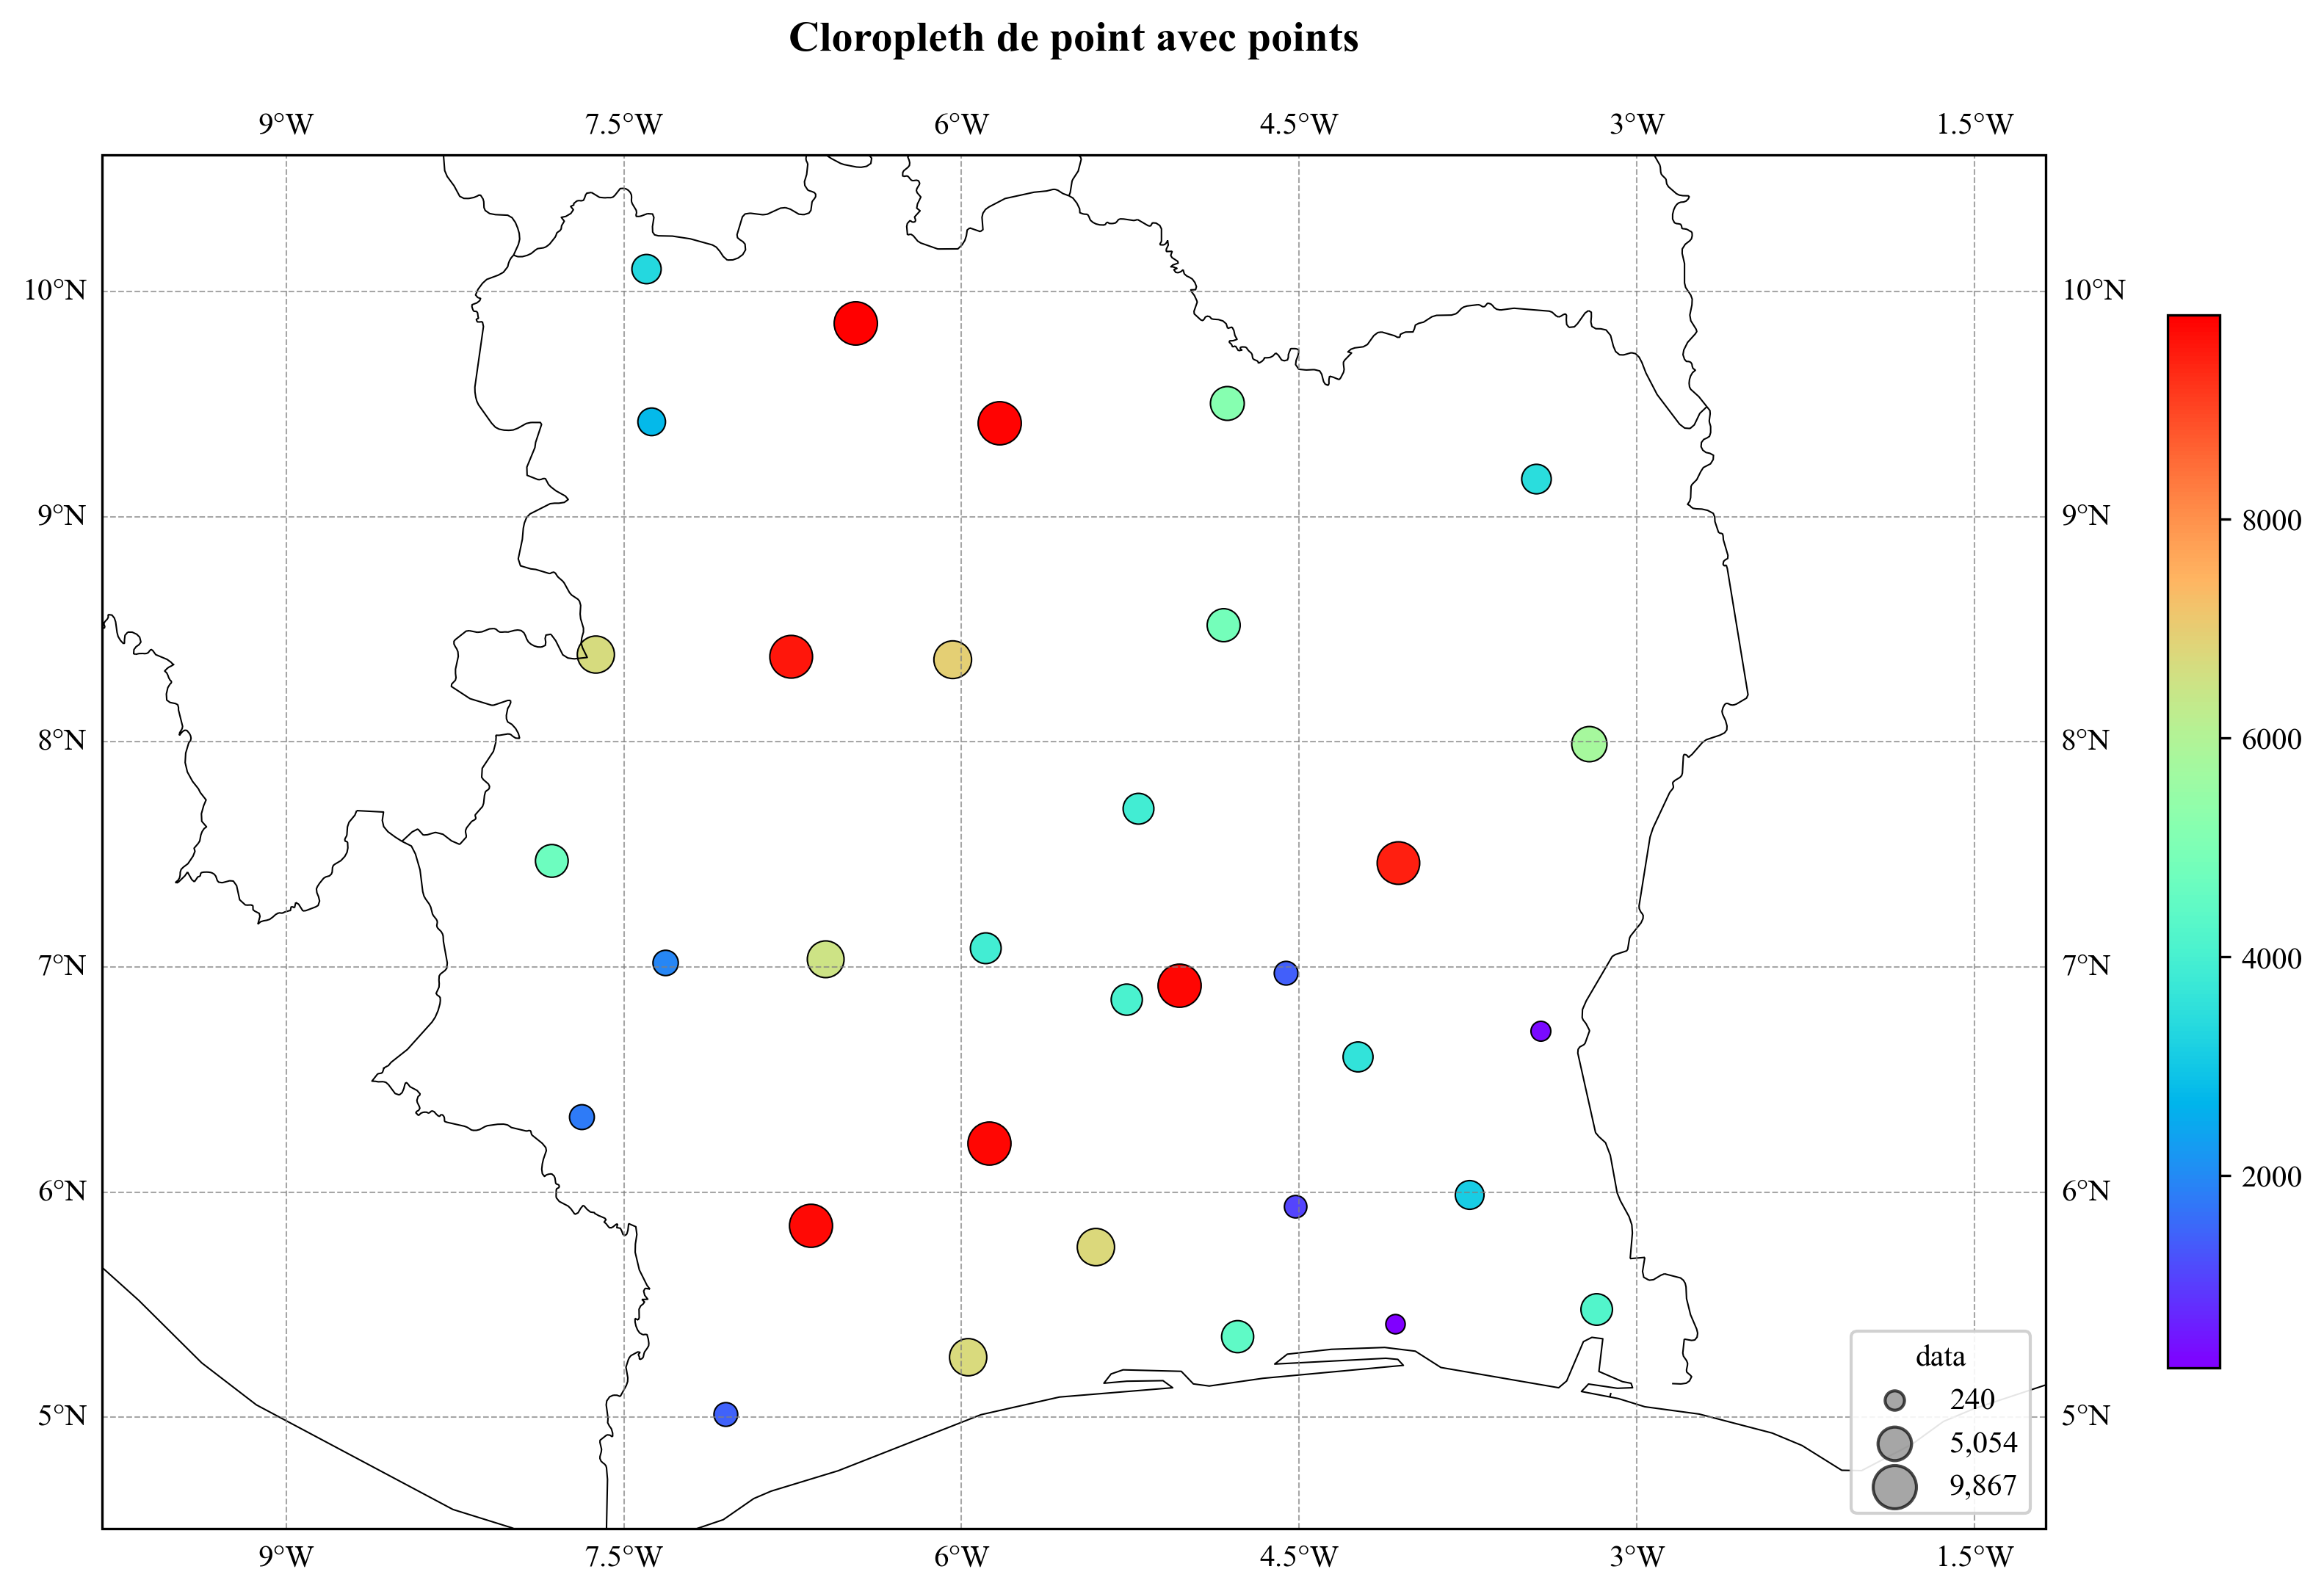

In [124]:
# Creer un simple cloropleth de point
#============================================
carte2=Map(figsize="A4")
centroide=centroids(geodf=civ_data)
# civ_bound0=client.adm("civ","ADM0")
# carte2.add_polygons(civ_bound0)
carte2.add_points_cloropleth(gdf=centroide,column_to_plot="data",point_size_column="data",cmap="rainbow",alpha=1)
carte2.add_gridlines()
carte2.set_title("Cloropleth de point avec points")
carte2.show()


In [125]:
# Creer un cloropleth de polygone
#=================================================

# Creation de client geoboundaries
bound=data.GeoBoundaries()

# Téléchargement des données de découpage administrativve du mali et du sénégale
dic=bound.adm(["sen","mali"],adm="ADM2")

# Fusion des données du découpages administratif
data_sen_mali=fusion(dataframes_list=[dic["sen"],dic["mali"]])
data_sen_mali.head()

geometry   shapeName shapeISO  \
0  POLYGON ((-11.88782 13.38481, -11.88765 13.391...       Bakel            
1  POLYGON ((-16.38592 15.02258, -16.40452 15.023...      Bambey            
2  POLYGON ((-15.9775 12.88596, -15.97446 12.8904...     Bignona            
3  POLYGON ((-15.59024 13.8291, -15.58246 13.8437...   Birkelane            
4  POLYGON ((-15.9775 12.88596, -15.97 12.89171, ...  Bounkiling            

                   shapeID shapeGroup shapeType  
0  50182788B16013842146029        SEN      ADM2  
1  50182788B75300917140294        SEN      ADM2  
2  50182788B19391387689457        SEN      ADM2  
3  50182788B56779252201559        SEN      ADM2  
4  50182788B68388966372963        SEN      ADM2

Vous pouvez utiliser explorer et manipuler **les palettes de couleurs** avec `colors` de cartograpy

In [126]:
# Chargement de la bibliothèque
from cartograpy import colors

In [127]:
# Création d'une colonne de données aléatoire

data_sen_mali=add_column(df=data_sen_mali,column_name="data",expression="random.randint(50,1000)",globals_dict={"random": random})

In [128]:
data_sen_mali.head()



geometry   shapeName shapeISO  \
0  POLYGON ((-11.88782 13.38481, -11.88765 13.391...       Bakel            
1  POLYGON ((-16.38592 15.02258, -16.40452 15.023...      Bambey            
2  POLYGON ((-15.9775 12.88596, -15.97446 12.8904...     Bignona            
3  POLYGON ((-15.59024 13.8291, -15.58246 13.8437...   Birkelane            
4  POLYGON ((-15.9775 12.88596, -15.97 12.89171, ...  Bounkiling            

                   shapeID shapeGroup shapeType  data  
0  50182788B16013842146029        SEN      ADM2   669  
1  50182788B75300917140294        SEN      ADM2   351  
2  50182788B19391387689457        SEN      ADM2   151  
3  50182788B56779252201559        SEN      ADM2   530  
4  50182788B68388966372963        SEN      ADM2   698

📄 Format de papier: A4 (landscape) - Dimensions: 210 x 297 mm - Figure: 11.7" x 8.3"


c:\Users\kanic\OneDrive\cartograpy\cartograpy\mapper.py:1544: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_obj = plt.cm.get_cmap(cmap)
Can't handle color: param(outline)


📊 Centrage intelligent appliqué:
   Format: A4 (landscape)
   Ratio figure: 1.41
   Ratio données: 1.47
   Étendue: [-19.27, 5.99, 8.64, 26.50]
📊 Centrage intelligent appliqué:
   Format: A4 (landscape)
   Ratio figure: 1.41
   Ratio données: 1.47
   Étendue: [-19.27, 5.99, 8.64, 26.50]


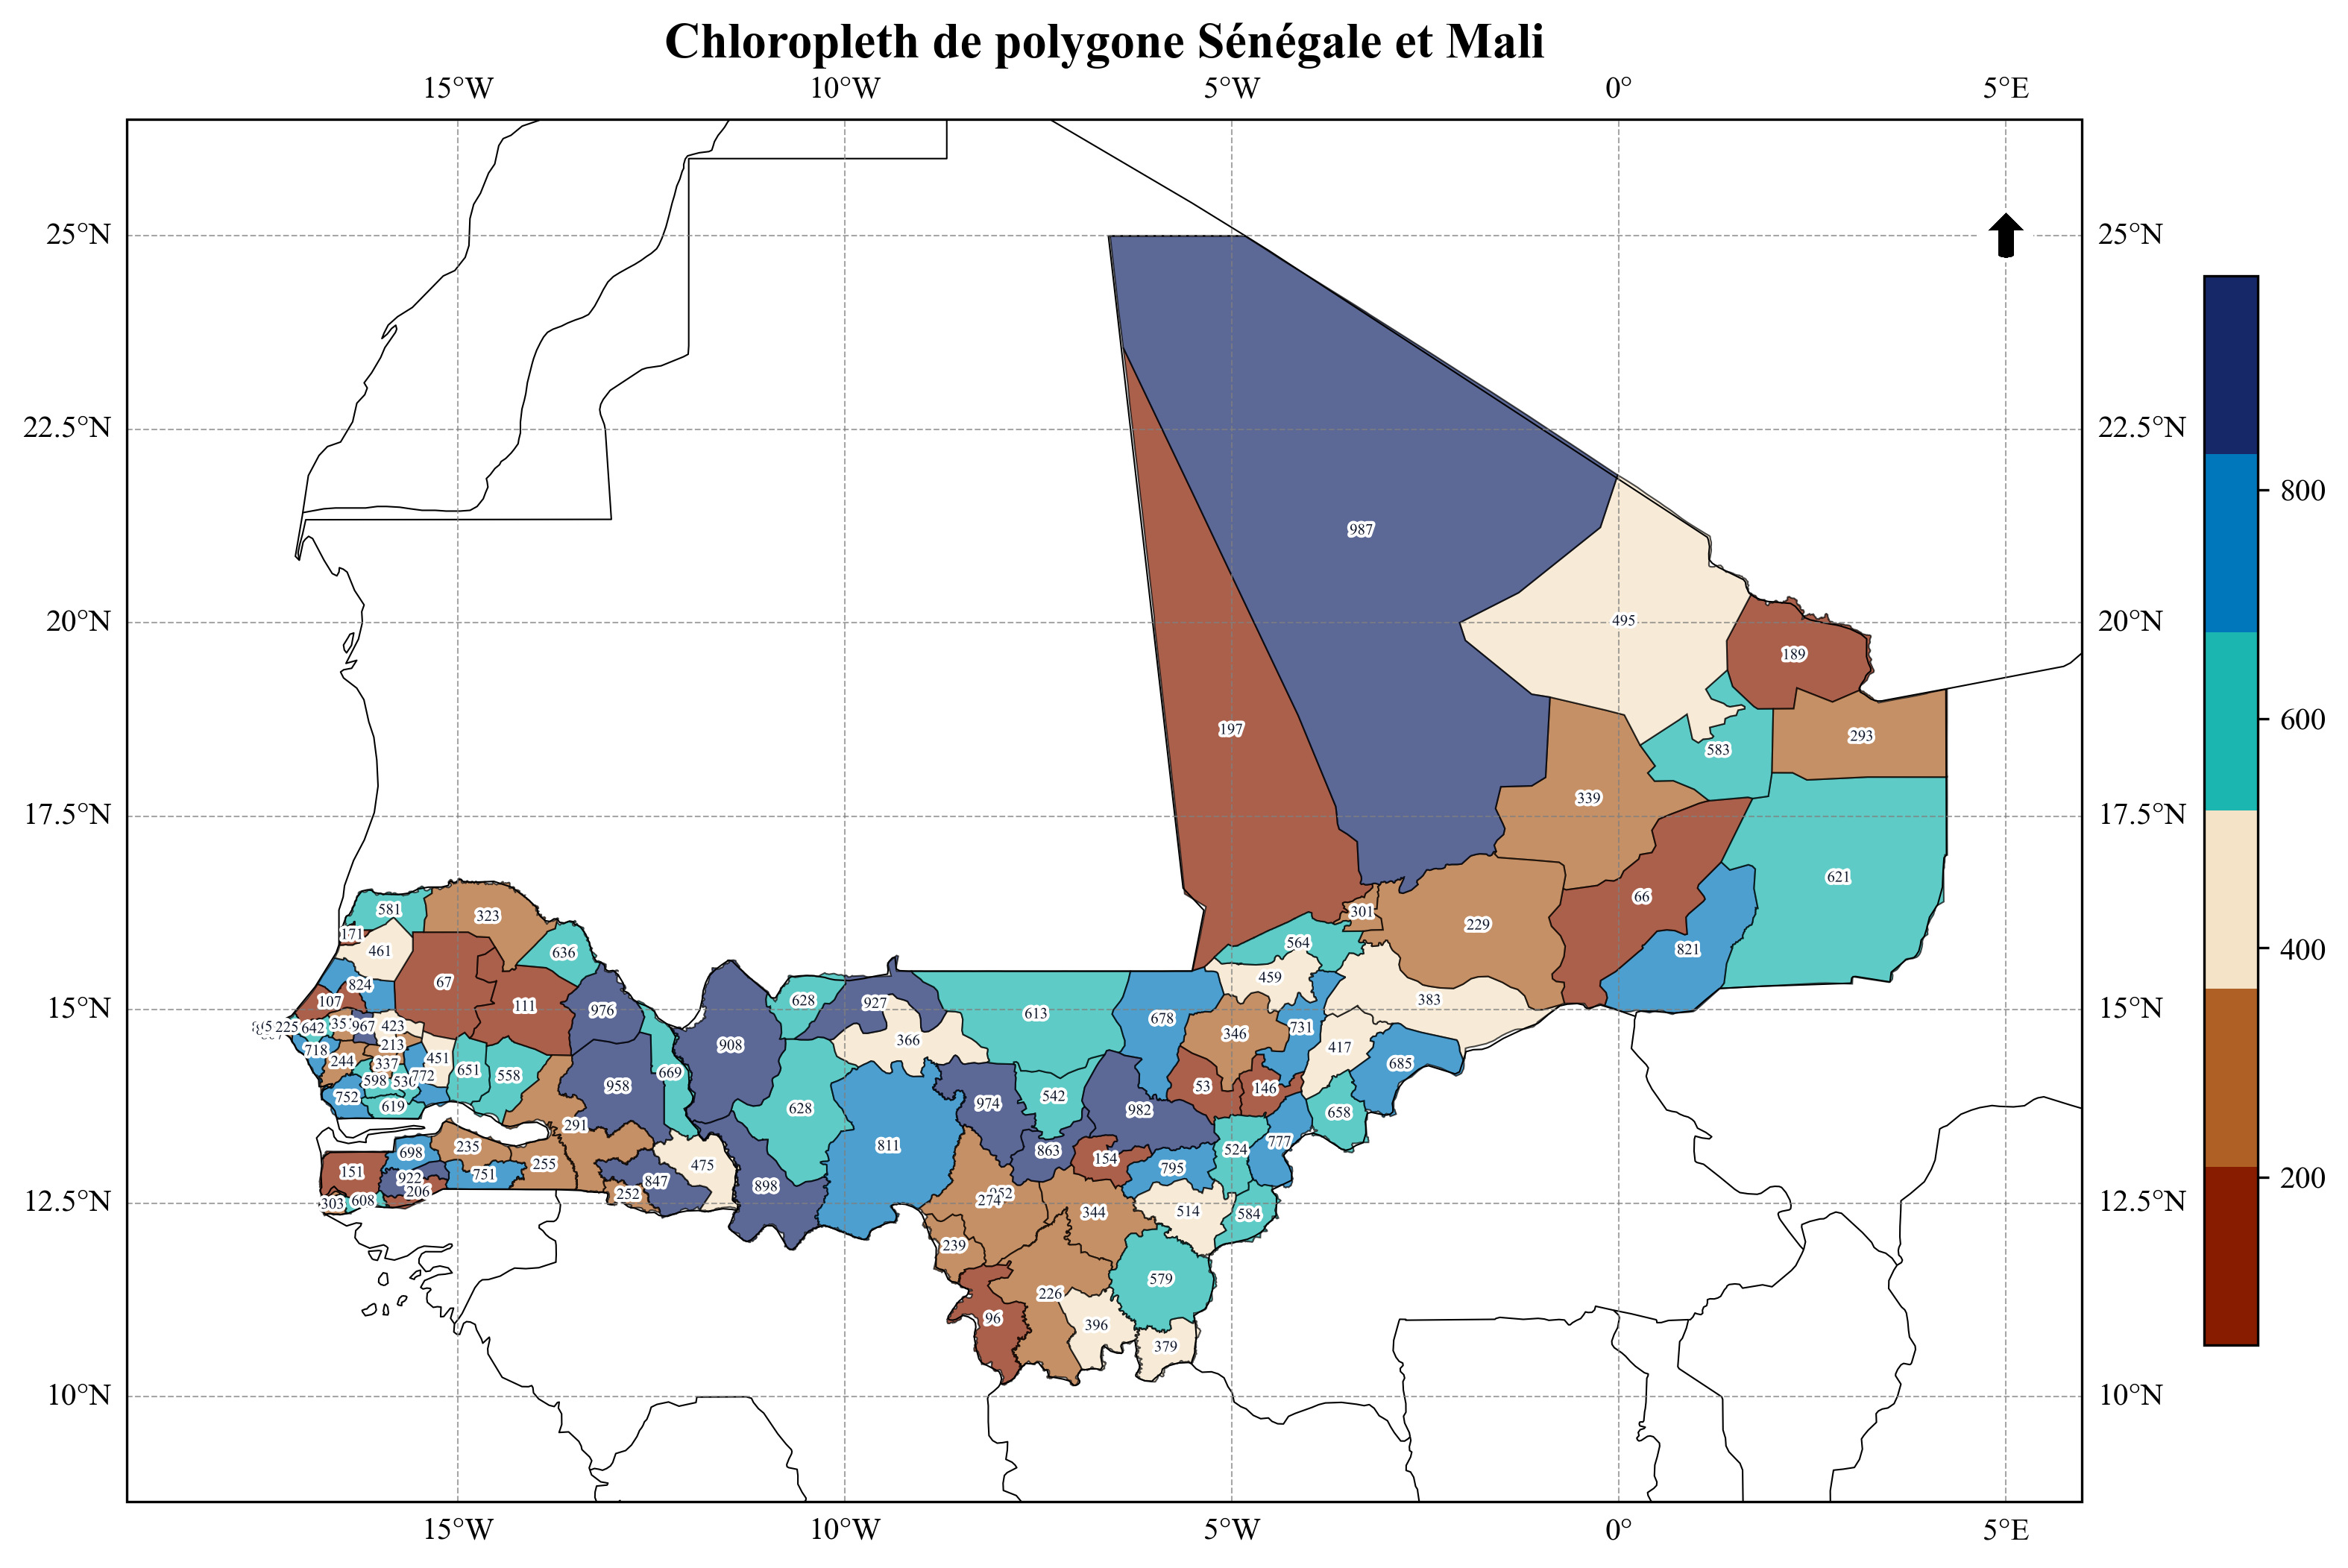

In [129]:
# Création de carte cloropleth
carte3 = Map (figsize="A4",title="Chloropleth de polygone Sénégale et Mali")
carte3.add_polygons_cloropleth(gdf=data_sen_mali,column_to_plot="data",cmap="Coconut")
carte3.add_labels(gdf=data_sen_mali,label_column="data",fontsize=5)
carte3.add_gridlines()
carte3.add_arrow(1,position=(5,25),zoom=0.03)
carte3.set_font(get_fonts("time")[0])
carte3.show()

### *Carte de ligne*

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kanic\AppData\Local\Temp\ipykernel_13180\2862275657.py:1: SyntaxWarning: invalid escape sequence '\s'
  path="data\\QGIS-Training-Data\\exercise_data\shapefile\\rivers.shp"
Can't handle color: param(outline)


📄 Format mis à jour: A5 (landscape) - Dimensions: 148 x 210 mm - Figure: 8.3" x 5.8"
⚠️  Attention: Le GeoDataFrame contient des géométries nulles qui seront ignorées
➕ Élément 'Rivière' ajouté à la légende
{'fontsize': 9, 'frameon': False, 'fancybox': False, 'shadow': False, 'framealpha': 1.0, 'handlelength': 1.5, 'handletextpad': 0.5, 'loc': 'lower right'}
🛑Element de légende ajouté None
✅ Légende personnalisée créée avec 1 éléments
🎨 Préréglage 'minimal' appliqué à la légende
📊 Centrage intelligent appliqué:
   Format: A5 (landscape)
   Ratio figure: 1.42
   Ratio données: 1.70
   Étendue: [19.06, 20.66, -34.39, -33.26]
🛑Element de légende ajouté None
✅ Légende personnalisée créée avec 1 éléments
Location est : (0.05, 0.05). La bare d'échelle est placé à 5.0 % de la longeur et à 5.0 % de la hauteur)
Location est : (0.15, 0.05). La bare d'échelle est placé à 15.0 % de la longeur et à 5.0 % de la hauteur)


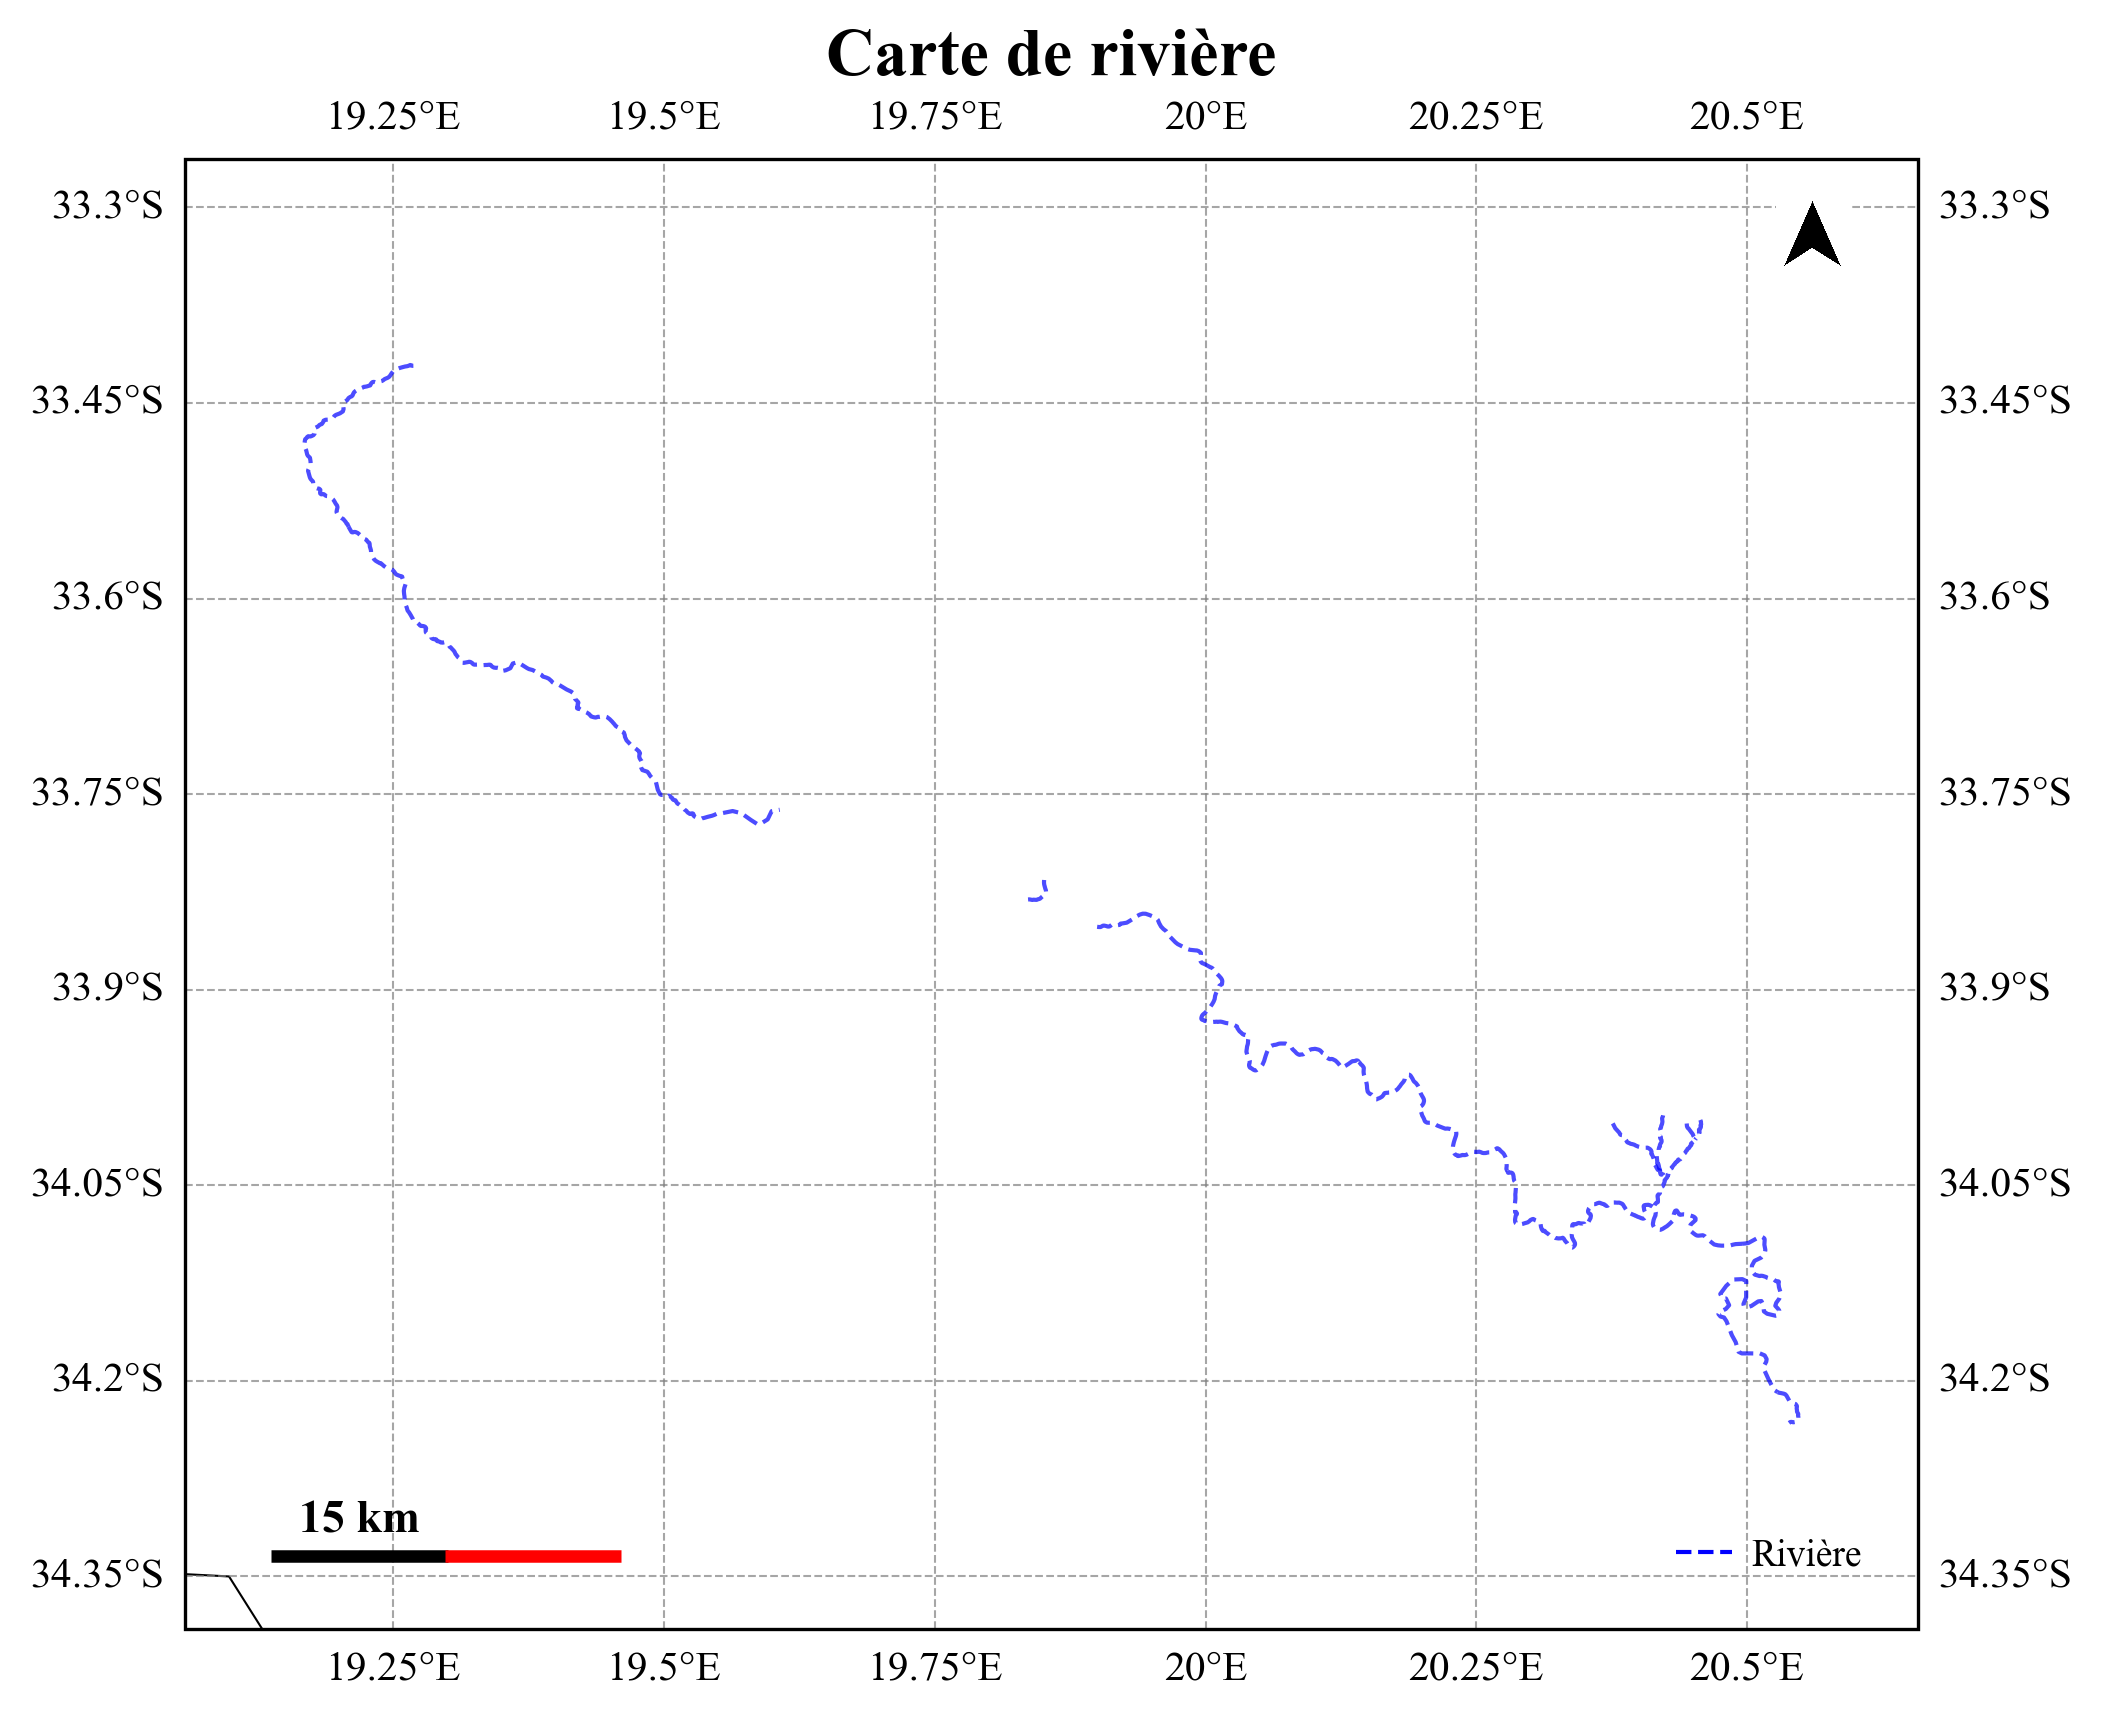

In [130]:
path="data\\QGIS-Training-Data\\exercise_data\shapefile\\rivers.shp"
data_riviere=load(path)
carte4=Map(title="Carte de rivière")
carte4.set_paper("A5")
carte4.add_lines(data_riviere,color="blue",alpha=0.7,linewidth=1,linestyle="--")
carte4.add_gridlines()
carte4.add_arrow(5,position=(20.56,-33.32),zoom=0.03)
carte4.add_scale_bar(15,units="km", pad=0.01,color="black",linewidth=3, location=(0.05,0.05))
carte4.add_scale_bar(15,units="km", pad=0.01,color="red",linewidth=3, location=(0.15,0.05),label="")
carte4.add_legend_element("line",color="blue",label="Rivière", linestyle="--", linewidth=1)
carte4.legend_presets("minimal" ,loc="lower right")
carte4.show()

### **Ajouter des couches de tous les types**

📄 Format de papier: A4 (landscape) - Dimensions: 210 x 297 mm - Figure: 11.7" x 8.3"
⚠️  Attention: Aucun CRS défini. Attribution du CRS par défaut: EPSG:4326
['Polygon' 'MultiPolygon']
⚠️  Attention: Aucun CRS défini. Attribution du CRS par défaut: EPSG:4326
['Point']
{'fontsize': 10, 'frameon': True, 'fancybox': True, 'shadow': True, 'framealpha': 0.9, 'facecolor': 'white', 'edgecolor': 'black', 'loc': 'lower right'}
🛑Element de légende ajouté None
✅ Légende personnalisée créée avec 2 éléments
🎨 Préréglage 'default' appliqué à la légende
📄 Format mis à jour: A4 (portrait) - Dimensions: 210 x 297 mm - Figure: 8.3" x 11.7"
📊 Centrage intelligent appliqué:
   Format: A4 (portrait)
   Ratio figure: 0.71
   Ratio données: 1.47
   Étendue: [-19.71, 6.42, -0.91, 36.05]
🛑Element de légende ajouté None
✅ Légende personnalisée créée avec 2 éléments


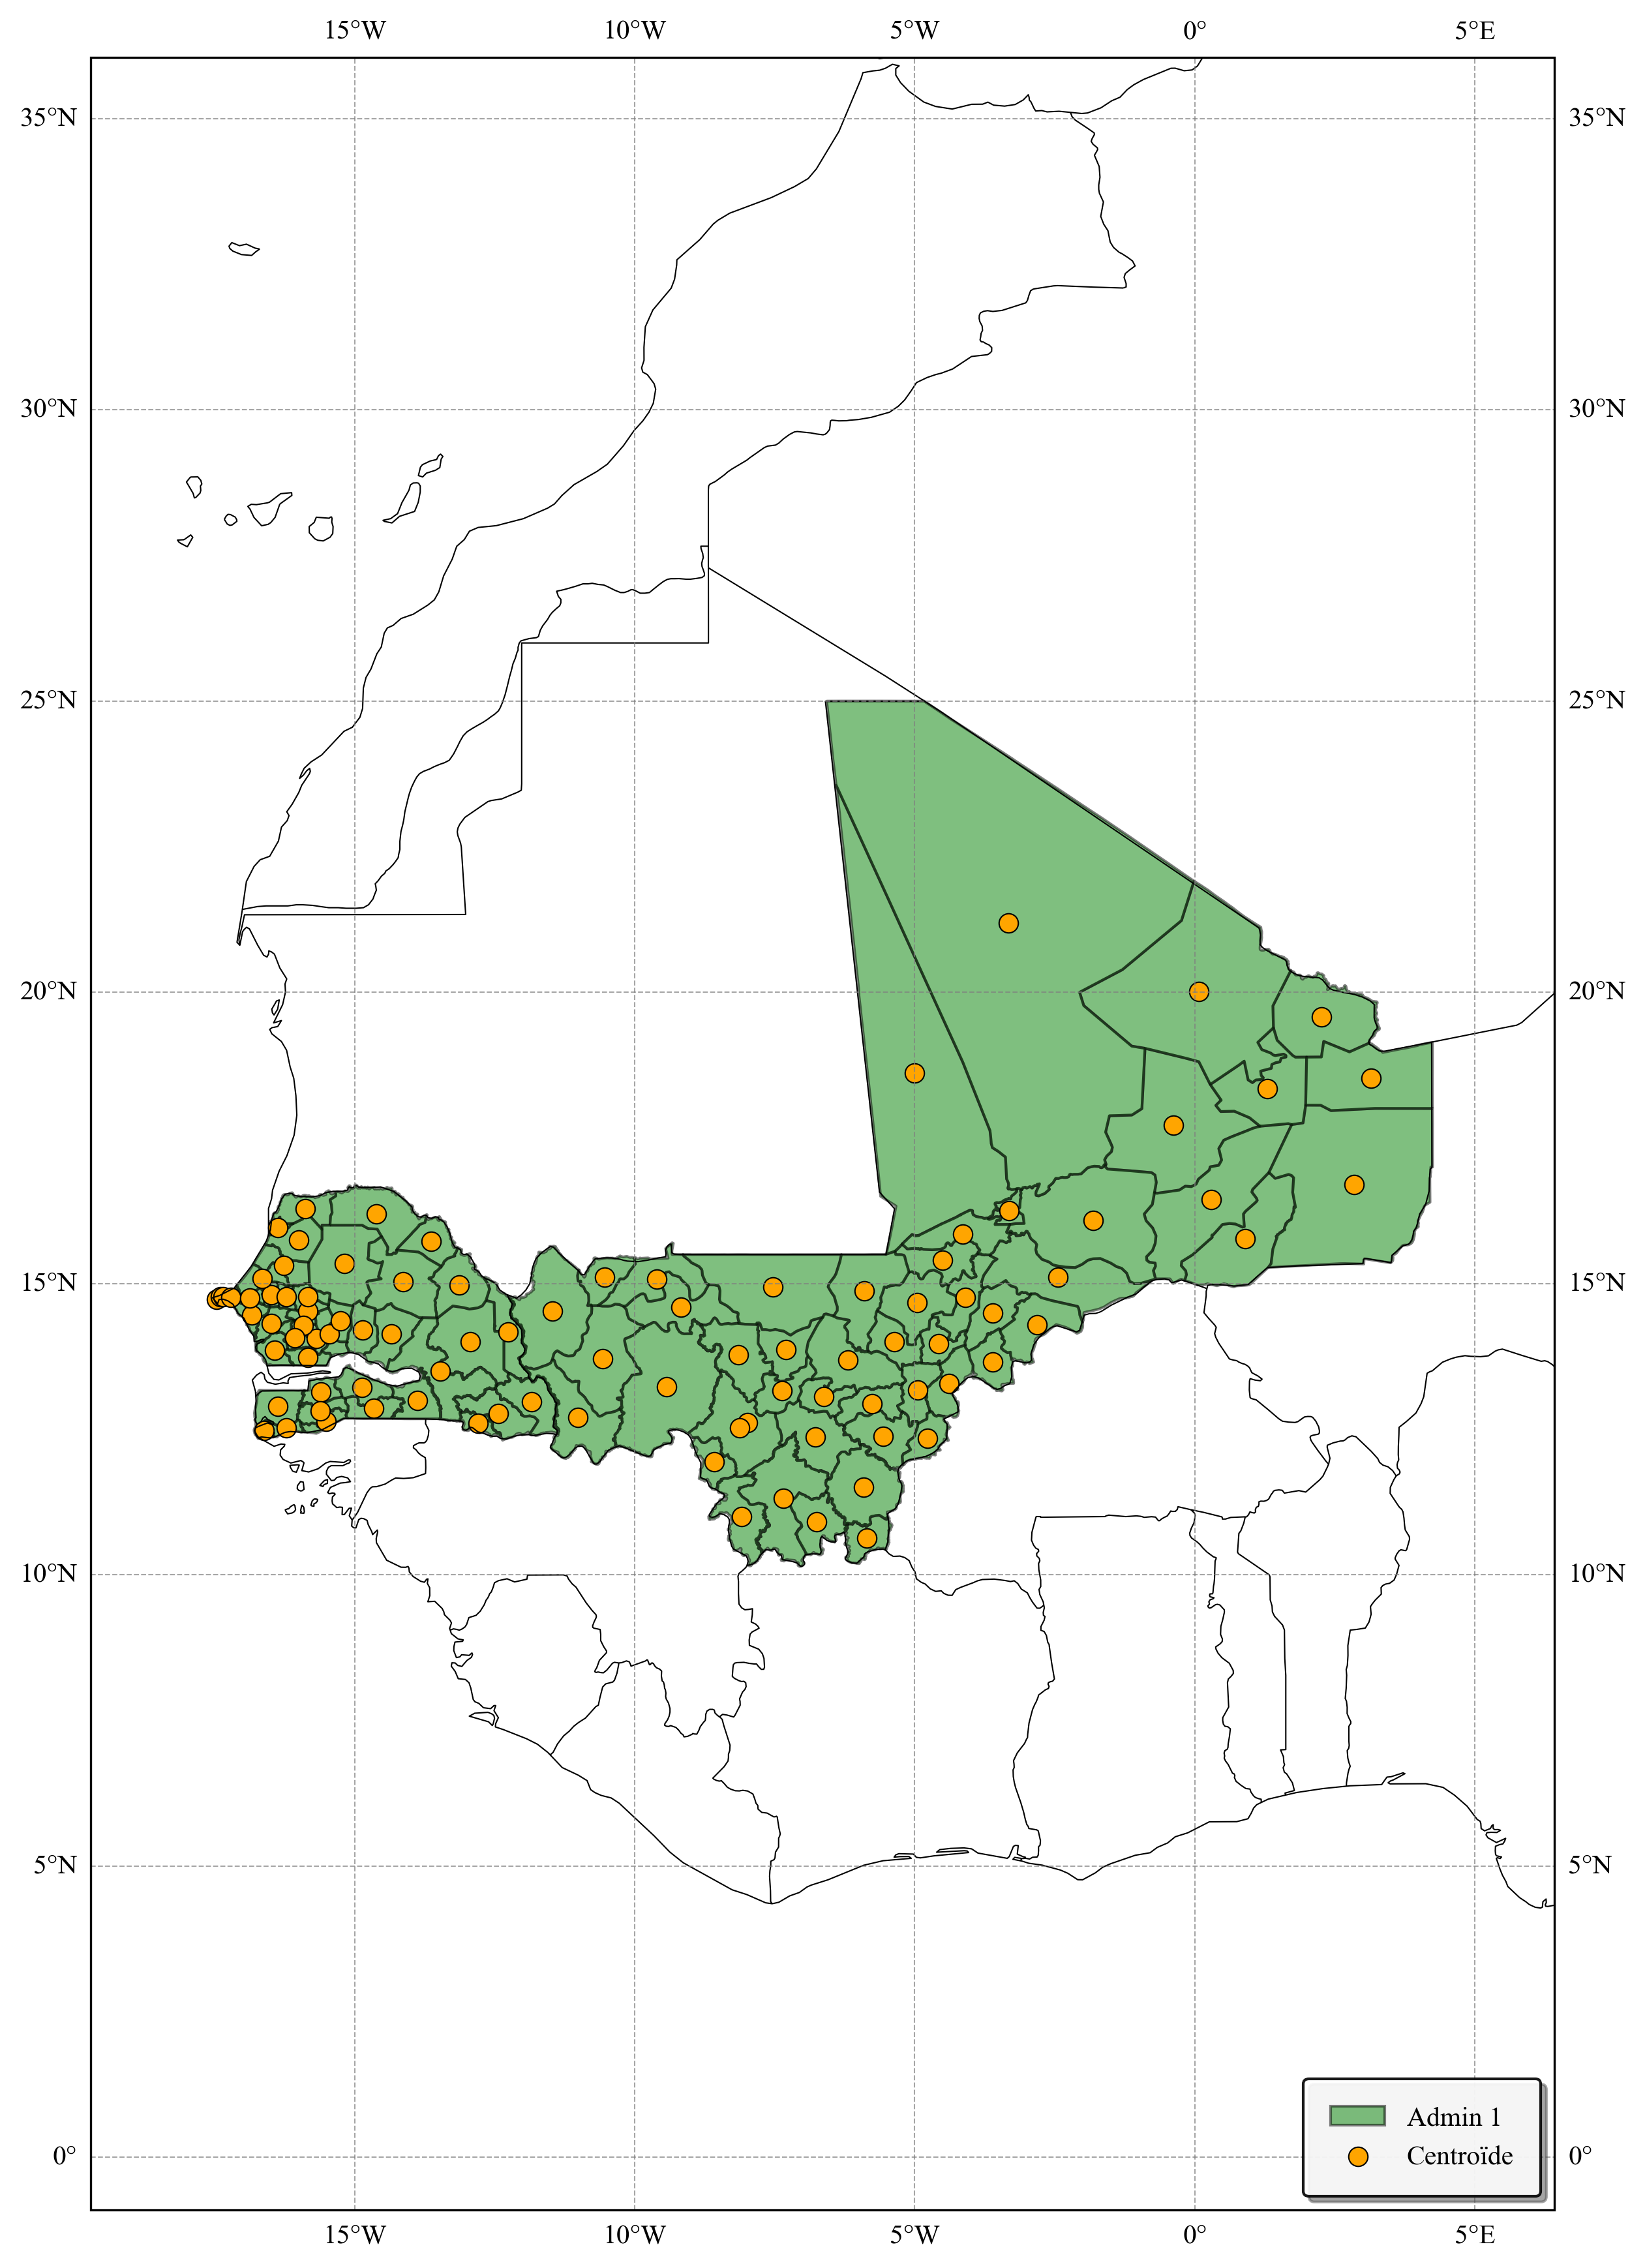

In [131]:
carte5=Map(figsize="A4",title="")
carte5.add_layer(data_sen_mali,label="Admin 1")
centroide_sen_mal=centroids(data_sen_mali)
carte5.add_layer(centroide_sen_mal,color="orange", label="Centroïde")
carte5.legend_presets(loc="lower right")
carte5.set_paper(paper_format="A4",orientation="portrait")
carte5.add_gridlines()
carte5.show()